## PUBG player analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import os
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("D:\Pubg_Statss.csv")
df

Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
0      StealthMaster             250    587     143       98         15243   
1         SniperLion             312    823     218      112         18975   
2         NinjaGamer             186    492      84       56         11786   
3      ThunderStrike             409    923     267      134         21037   
4         SpeedDemon             143    368      68       42          9865   
..               ...             ...    ...     ...      ...           ...   
106     CrimsonRider             294    743     187      132         17567   
107  BlazingSorcerer             203    521     109       72         13123   
108      FrozenFlare             206    553     117       76         13756   
109    AbyssGuardian             220    597     144       98         14967   
110  SpectralPhantom             225    624     149      100         15345   

     Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  \
0          234    32      145       67              72560            12   
1          312    42      189       95              89042            15   
2          156    28       97       48              60924            10   
3          288    55      258      128              98234            18   
4          123    20       72       36              52072             8   
..         ...   ...      ...      ...                ...           ...   
106        242    39      133       67              66987            13   
107        193    27       91       45              55487            10   
108        196    29       96       49              58789            10   
109        212    32      108       54              60978            11   
110        219    33      110       55              61789            11   

     Time_Survived      Rank  
0            28976      Gold  
1            33652   Diamond  
2            21764  Platinum  
3            40128    Silver  
4            16834      Gold  
..             ...       ...  
106          28345   Diamond  
107          23267      Gold  
108          24579  Platinum  
109          25679  Platinum  
110          25967  Platinum  

[111 rows x 14 columns]

# data cleaning and  preprocessing

In [3]:
df.shape

(111, 14)

In [4]:
for i in df.columns:
    print(i)

Player_Name
Matches_Played
Kills
Deaths
Assists
Damage_Dealt
Headshots
Wins
Top_10s
Revives
Distance_Traveled
Weapons_Used
Time_Survived
Rank


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Player_Name        111 non-null    object
 1   Matches_Played     111 non-null    int64 
 2   Kills              111 non-null    int64 
 3   Deaths             111 non-null    int64 
 4   Assists            111 non-null    int64 
 5   Damage_Dealt       111 non-null    int64 
 6   Headshots          111 non-null    int64 
 7   Wins               111 non-null    int64 
 8   Top_10s            111 non-null    int64 
 9   Revives            111 non-null    int64 
 10  Distance_Traveled  111 non-null    int64 
 11  Weapons_Used       111 non-null    int64 
 12  Time_Survived      111 non-null    int64 
 13  Rank               111 non-null    object
dtypes: int64(12), object(2)
memory usage: 12.3+ KB


### remove dupicates

In [6]:
df.drop_duplicates()

Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
0      StealthMaster             250    587     143       98         15243   
1         SniperLion             312    823     218      112         18975   
2         NinjaGamer             186    492      84       56         11786   
3      ThunderStrike             409    923     267      134         21037   
4         SpeedDemon             143    368      68       42          9865   
..               ...             ...    ...     ...      ...           ...   
106     CrimsonRider             294    743     187      132         17567   
107  BlazingSorcerer             203    521     109       72         13123   
108      FrozenFlare             206    553     117       76         13756   
109    AbyssGuardian             220    597     144       98         14967   
110  SpectralPhantom             225    624     149      100         15345   

     Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  \
0          234    32      145       67              72560            12   
1          312    42      189       95              89042            15   
2          156    28       97       48              60924            10   
3          288    55      258      128              98234            18   
4          123    20       72       36              52072             8   
..         ...   ...      ...      ...                ...           ...   
106        242    39      133       67              66987            13   
107        193    27       91       45              55487            10   
108        196    29       96       49              58789            10   
109        212    32      108       54              60978            11   
110        219    33      110       55              61789            11   

     Time_Survived      Rank  
0            28976      Gold  
1            33652   Diamond  
2            21764  Platinum  
3            40128    Silver  
4            16834      Gold  
..             ...       ...  
106          28345   Diamond  
107          23267      Gold  
108          24579  Platinum  
109          25679  Platinum  
110          25967  Platinum  

[111 rows x 14 columns]

#### 5 point summary

In [7]:
df.describe()

Matches_Played       Kills      Deaths     Assists  Damage_Dealt  \
count      111.000000  111.000000  111.000000  111.000000    111.000000   
mean       235.198198  613.378378  142.990991   92.981982  14825.189189   
std         39.991094   93.914957   34.428977   21.797824   1987.446043   
min        143.000000  368.000000   68.000000   42.000000   9865.000000   
25%        206.500000  545.000000  117.000000   76.000000  13583.000000   
50%        225.000000  612.000000  142.000000   93.000000  14967.000000   
75%        256.500000  674.000000  167.000000  110.500000  16021.500000   
max        409.000000  923.000000  267.000000  139.000000  21037.000000   

        Headshots        Wins     Top_10s     Revives  Distance_Traveled  \
count  111.000000  111.000000  111.000000  111.000000         111.000000   
mean   207.522523   31.963964  111.306306   54.729730       61849.099099   
std     30.938898    5.952735   26.765240   11.898775        6604.597195   
min    123.000000   18.000000   67.000000   32.000000       49785.000000   
25%    193.000000   29.000000   97.000000   48.000000       58270.500000   
50%    210.000000   32.000000  108.000000   54.000000       60987.000000   
75%    224.500000   35.500000  120.000000   59.000000       63413.500000   
max    312.000000   55.000000  258.000000  128.000000       98234.000000   

       Weapons_Used  Time_Survived  
count    111.000000     111.000000  
mean      10.927928   25610.945946  
std        1.456719    2978.860621  
min        8.000000   16834.000000  
25%       10.000000   24162.000000  
50%       11.000000   25568.000000  
75%       12.000000   26767.500000  
max       18.000000   40128.000000

#### check null values

In [8]:
df.isna().any()

Player_Name          False
Matches_Played       False
Kills                False
Deaths               False
Assists              False
Damage_Dealt         False
Headshots            False
Wins                 False
Top_10s              False
Revives              False
Distance_Traveled    False
Weapons_Used         False
Time_Survived        False
Rank                 False
dtype: bool

In [9]:
df.head(5)

Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
0  StealthMaster             250    587     143       98         15243   
1     SniperLion             312    823     218      112         18975   
2     NinjaGamer             186    492      84       56         11786   
3  ThunderStrike             409    923     267      134         21037   
4     SpeedDemon             143    368      68       42          9865   

   Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  \
0        234    32      145       67              72560            12   
1        312    42      189       95              89042            15   
2        156    28       97       48              60924            10   
3        288    55      258      128              98234            18   
4        123    20       72       36              52072             8   

   Time_Survived      Rank  
0          28976      Gold  
1          33652   Diamond  
2          21764  Platinum  
3          40128    Silver  
4          16834      Gold

In [10]:
df.dtypes

Player_Name          object
Matches_Played        int64
Kills                 int64
Deaths                int64
Assists               int64
Damage_Dealt          int64
Headshots             int64
Wins                  int64
Top_10s               int64
Revives               int64
Distance_Traveled     int64
Weapons_Used          int64
Time_Survived         int64
Rank                 object
dtype: object

In [11]:
df.nunique()

Player_Name          106
Matches_Played        70
Kills                 90
Deaths                82
Assists               65
Damage_Dealt         102
Headshots             70
Wins                  28
Top_10s               59
Revives               39
Distance_Traveled    105
Weapons_Used           9
Time_Survived        107
Rank                   4
dtype: int64

In [12]:
df["Player_Name"].unique()

array(['StealthMaster', 'SniperLion', 'NinjaGamer', 'ThunderStrike',
       'SpeedDemon', 'BlazeFury', 'RapidShadow', 'Frostbite',
       'SavageQueen', 'SwiftStriker', 'VenomousViper', 'PhoenixFury',
       'SteelStorm', 'BlazingBlade', 'StormChaser', 'Nightmare',
       'CrimsonTide', 'SilentShadow', 'VengefulViper', 'SolarFlare',
       'SkyDancer', 'RogueWraith', 'LethalLynx', 'FrostFang',
       'ScarletStrider', 'RagingRaptor', 'ShadowWisp', 'VenomStrike',
       'FireFury', 'BlazingSun', 'ShadowStrike', 'SteelGuardian',
       'WickedWitch', 'RuthlessRaptor', 'FrostyFox', 'ViperVenom',
       'CrimsonReaper', 'PhantomGhost', 'StormStrider', 'StormBreaker',
       'SapphireSword', 'ShadowReign', 'DragonSlayer', 'SilverShadow',
       'EagleEye', 'BlazingStorm', 'MidnightSage', 'RapidBlaze',
       'FrostFire', 'ScarletWitch', 'RagingTiger', 'SpectralRogue',
       'BlazingRaptor', 'EternalShadow', 'WickedStrider', 'CrimsonStorm',
       'RuthlessReaper', 'FrostFury', 'ShadowBlade

In [13]:
df["Player_Name"].value_counts()

Player_Name
Frostbite          2
FrostFire          2
VenomousViper      2
LunarShadow        2
VengefulViper      2
                  ..
FrostyFox          1
RuthlessRaptor     1
WickedWitch        1
SteelGuardian      1
SpectralPhantom    1
Name: count, Length: 106, dtype: int64

# univariate analysis

array([[<Axes: title={'center': 'Matches_Played'}>,
        <Axes: title={'center': 'Kills'}>,
        <Axes: title={'center': 'Deaths'}>],
       [<Axes: title={'center': 'Assists'}>,
        <Axes: title={'center': 'Damage_Dealt'}>,
        <Axes: title={'center': 'Headshots'}>],
       [<Axes: title={'center': 'Wins'}>,
        <Axes: title={'center': 'Top_10s'}>,
        <Axes: title={'center': 'Revives'}>],
       [<Axes: title={'center': 'Distance_Traveled'}>,
        <Axes: title={'center': 'Weapons_Used'}>,
        <Axes: title={'center': 'Time_Survived'}>]], dtype=object)

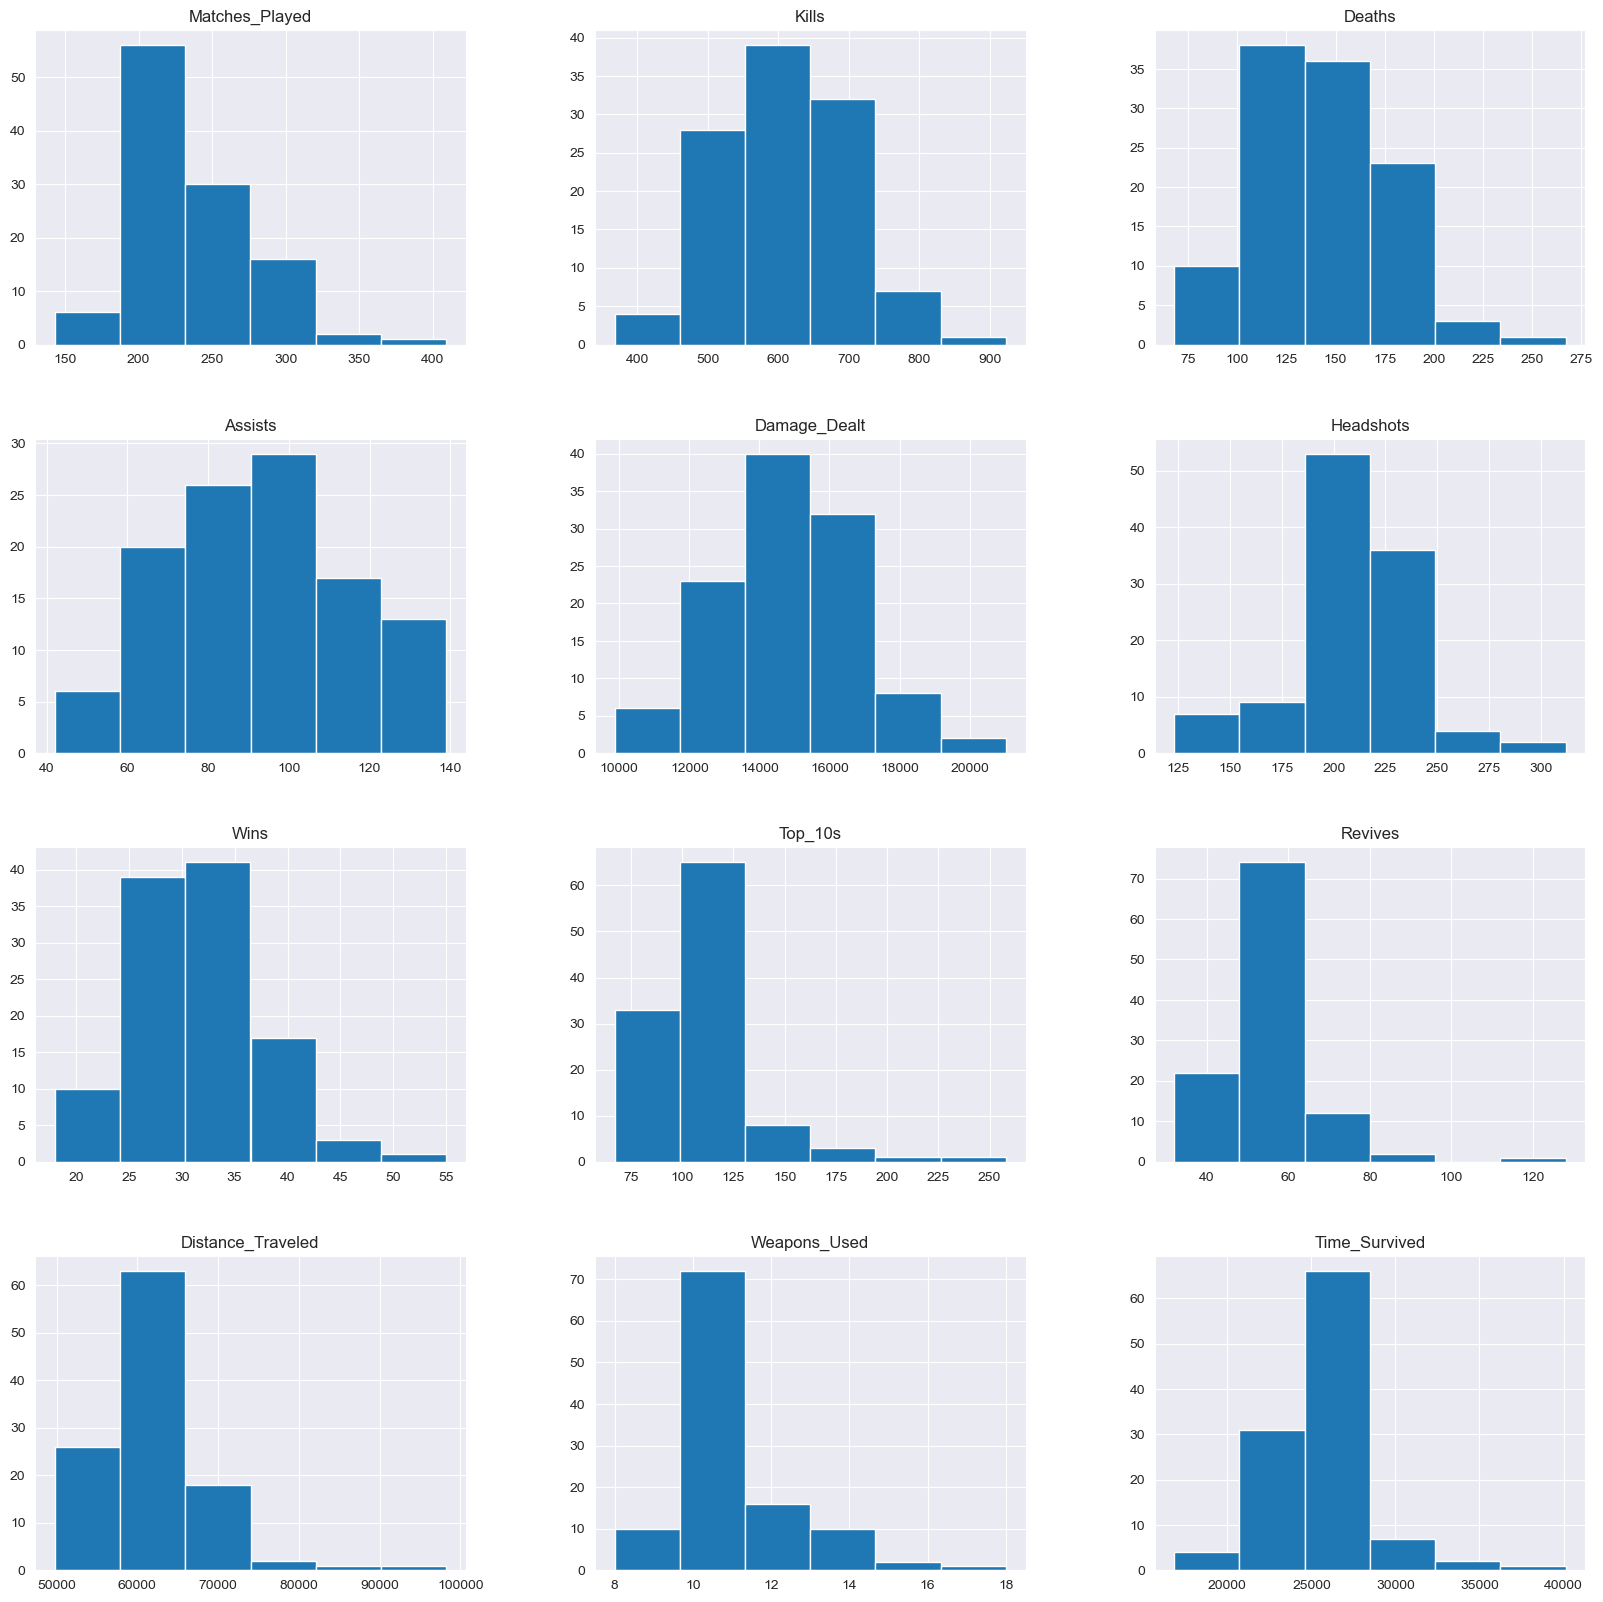

In [14]:
col=list(df)[0:]
df[col].hist(stacked=False,bins=6,figsize=(20,20))

## distribution and outliers analysis of numerical values

#### matches played

 The outliers of Matches_Played 3


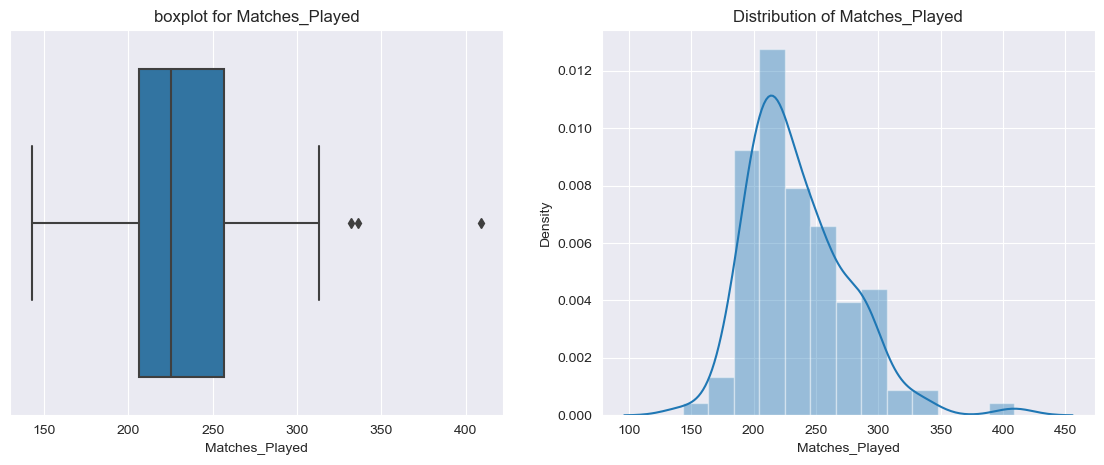

In [15]:
f,axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x="Matches_Played",data=df,ax=axes[0])
sns.distplot(df["Matches_Played"],ax=axes[1])
axes[0].set_title("boxplot for Matches_Played")
axes[1].set_title("Distribution of Matches_Played")

#find the outliers for the Matches_Played

q25,q75=np.percentile(df["Matches_Played"],25),np.percentile(df["Matches_Played"],75)

IQR=q75-q25
cutoff=IQR*1.5
lower,upper=q25-cutoff,q75+cutoff
outliers=[x for x in df["Matches_Played"]if x<lower or x>upper]
print("{} The outliers of Matches_Played {}".format("\033[1m",len(outliers)))


#### we can see positive skewness data.
#### The highest matches played between 200 to 300
#### we can see 3 outliers

## kills

 The outliers of Kills 1


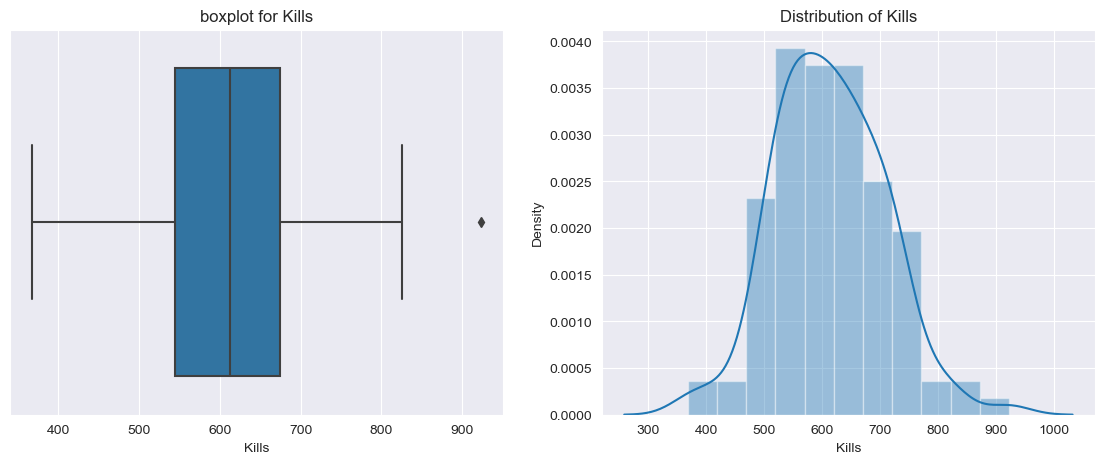

In [16]:
f,axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x="Kills",data=df,ax=axes[0])
sns.distplot(df["Kills"],ax=axes[1])
axes[0].set_title("boxplot for Kills")
axes[1].set_title("Distribution of Kills")

#find the outliers for the time survived

q25,q75=np.percentile(df["Kills"],25),np.percentile(df["Kills"],75)

IQR=q75-q25
cutoff=IQR*1.5
lower,upper=q25-cutoff,q75+cutoff
outliers=[x for x in df["Kills"]if x<lower or x>upper]
print("{} The outliers of Kills {}".format("\033[1m",len(outliers)))


### we can see normally distributed
### little right skewness due to one outliers

## outlier for all numerical columns

In [17]:
df.columns

Index(['Player_Name', 'Matches_Played', 'Kills', 'Deaths', 'Assists',
       'Damage_Dealt', 'Headshots', 'Wins', 'Top_10s', 'Revives',
       'Distance_Traveled', 'Weapons_Used', 'Time_Survived', 'Rank'],
      dtype='object')

In [18]:
col=['Matches_Played', 'Kills', 'Deaths', 'Assists',
       'Damage_Dealt', 'Headshots', 'Wins', 'Top_10s', 'Revives',
       'Distance_Traveled', 'Weapons_Used', 'Time_Survived']
for i in col:
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)

    IQR=q75-q25
    cutoff=IQR*1.5
    lower,upper=q25-cutoff,q75+cutoff
    outliers=[x for x in df[i]if x<lower or x>upper]
    print("{} The outliers of {}: {}".format("\033[1m",i,len(outliers)))

    

 The outliers of Matches_Played: 3
 The outliers of Kills: 1
 The outliers of Deaths: 1
 The outliers of Assists: 0
 The outliers of Damage_Dealt: 4
 The outliers of Headshots: 9
 The outliers of Wins: 5
 The outliers of Top_10s: 5
 The outliers of Revives: 4
 The outliers of Distance_Traveled: 8
 The outliers of Weapons_Used: 1
 The outliers of Time_Survived: 9


## Distribution for all numerical columns



<Figure size 640x480 with 0 Axes>

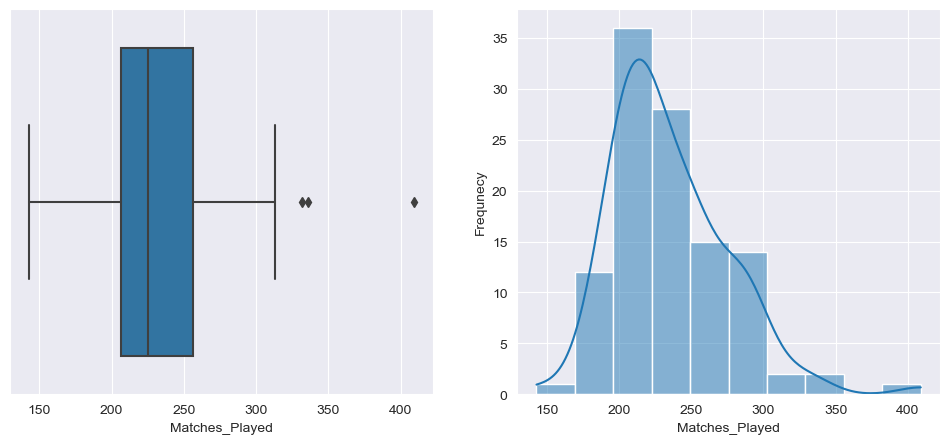

<Figure size 640x480 with 0 Axes>

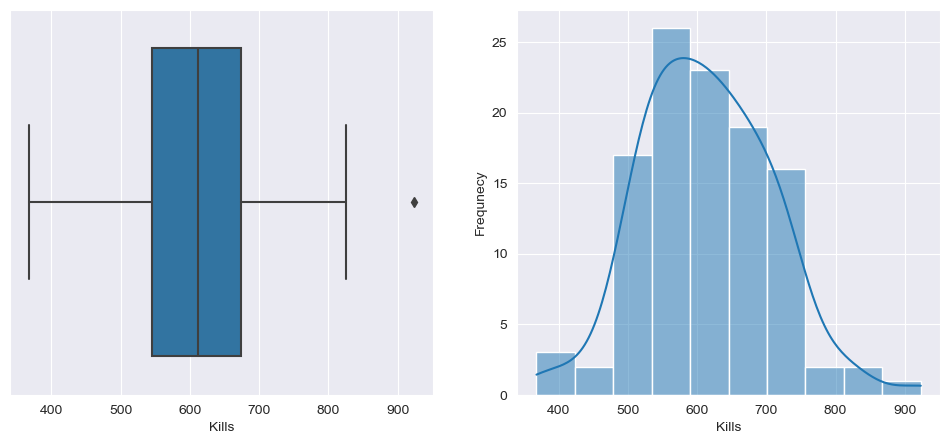

<Figure size 640x480 with 0 Axes>

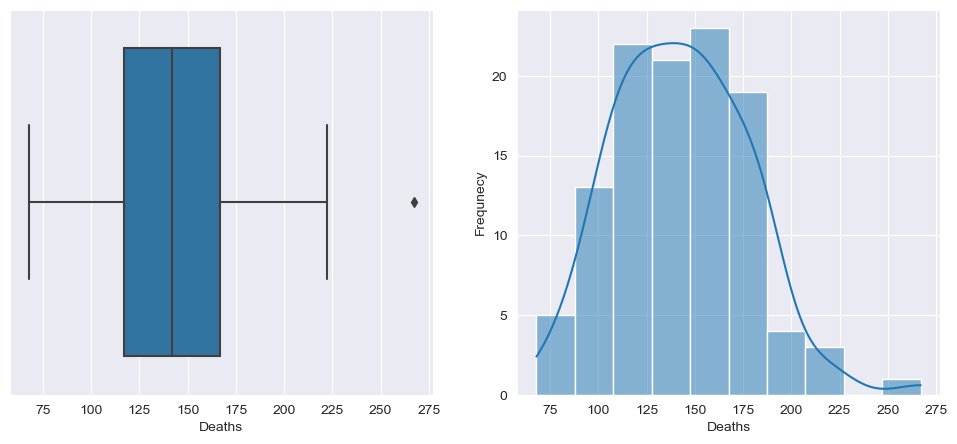

<Figure size 640x480 with 0 Axes>

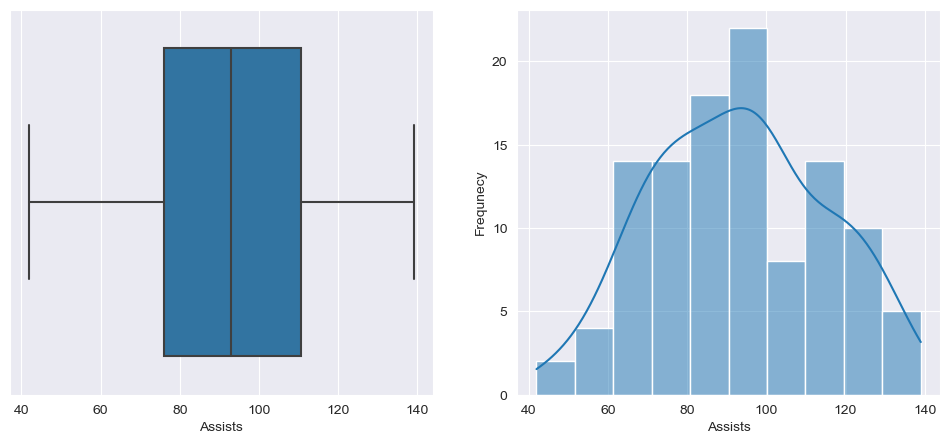

<Figure size 640x480 with 0 Axes>

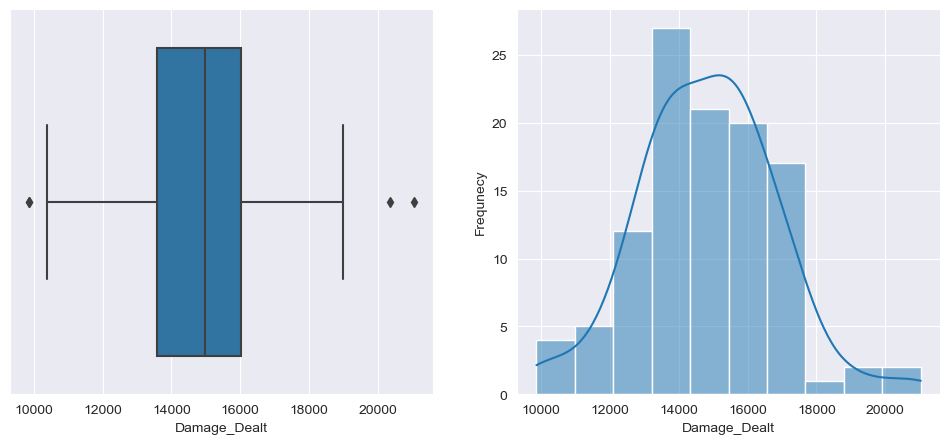

<Figure size 640x480 with 0 Axes>

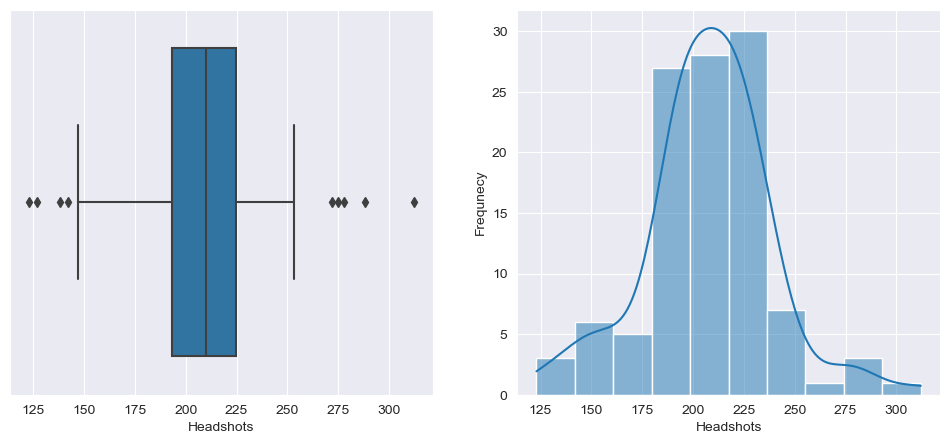

<Figure size 640x480 with 0 Axes>

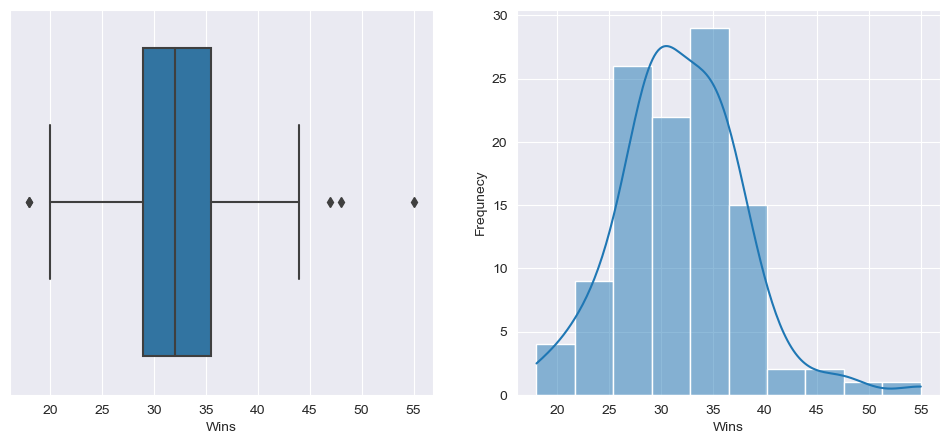

<Figure size 640x480 with 0 Axes>

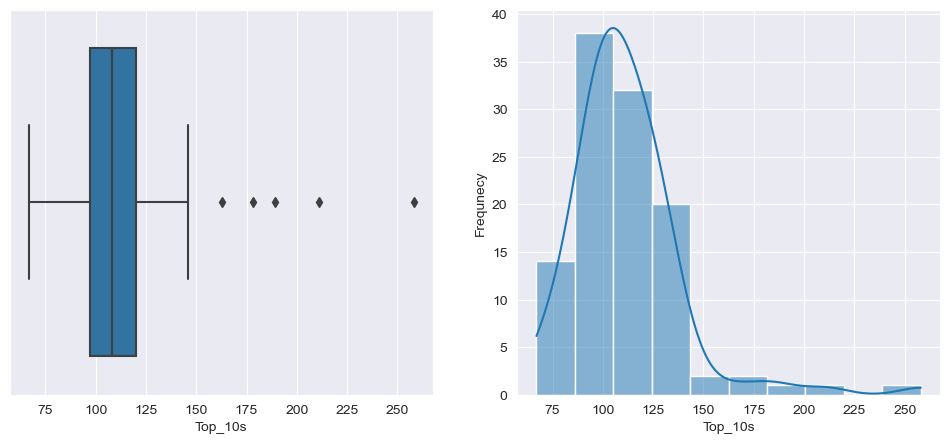

<Figure size 640x480 with 0 Axes>

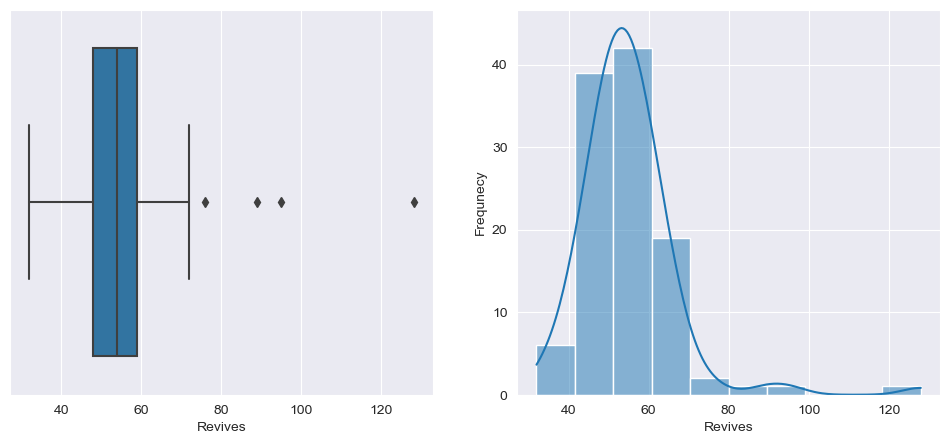

<Figure size 640x480 with 0 Axes>

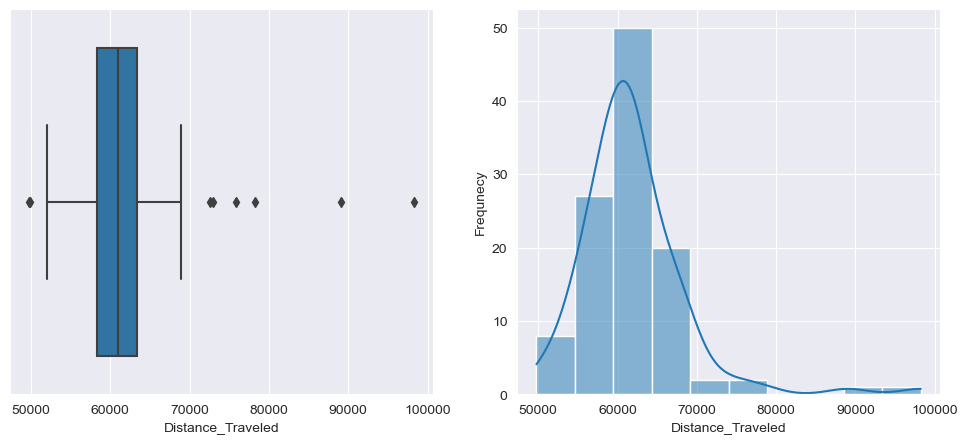

<Figure size 640x480 with 0 Axes>

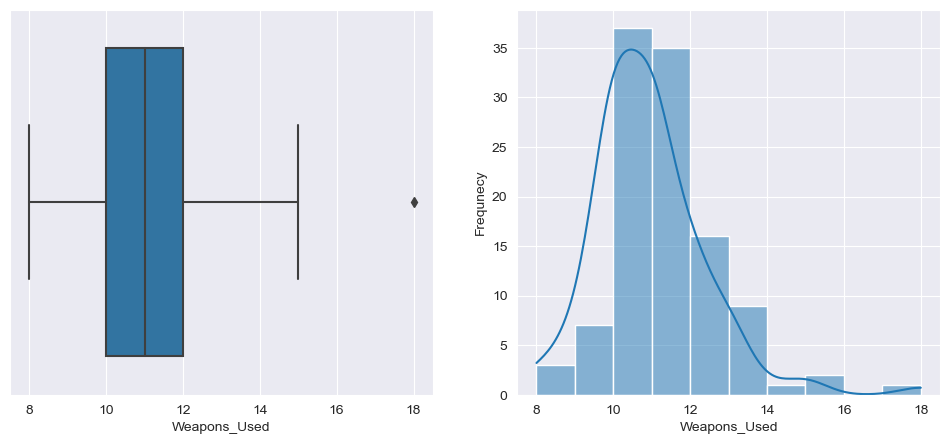

<Figure size 640x480 with 0 Axes>

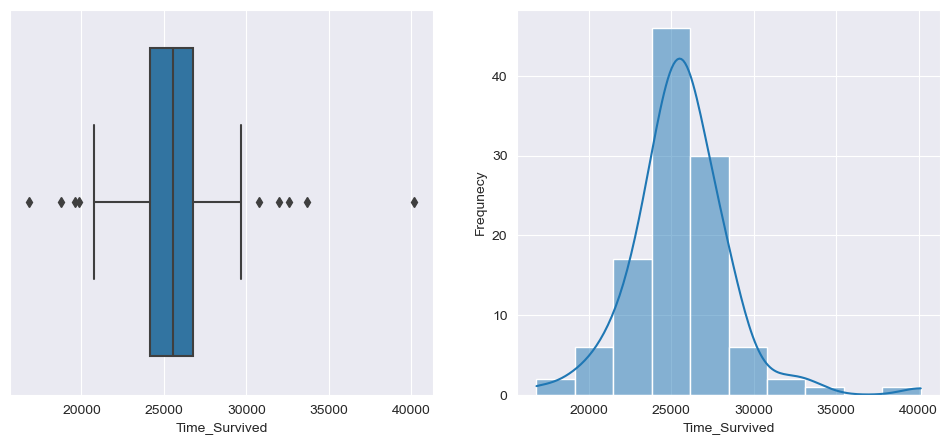

In [19]:
for i in col:
    plt.figure()
    #plt.tight_layout()
    #sns.set(rc={"figure.figsize":(12,5)})
    f,axes=plt.subplots(1,2,sharex=True,figsize=(12,5))
    plt.gca().set(xlabel=i,ylabel="Frequnecy")
    sns.boxplot(x=df[i],ax=axes[0])
    sns.histplot(df[i],ax=axes[1],bins=10,kde=True)
    
    """
    or 
    f,(ax_box,ax_hist)=plt.subplots(2)
    sns.boxplot(x=df[i],ax=ax_box,linewidth=1.0)
    sns.distplot(df[i],ax=ax_hist,bins=10,kde=True)"""

## distribution for categorical column

<Axes: xlabel='Rank', ylabel='count'>

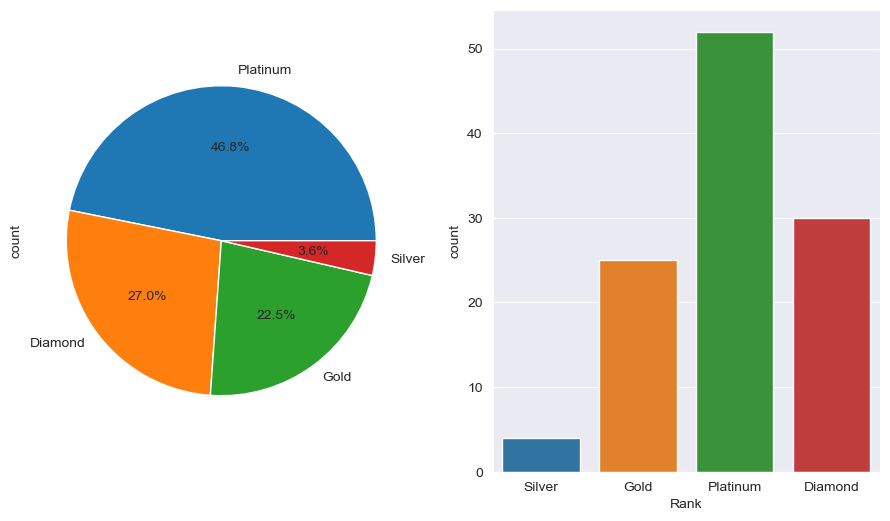

In [20]:
f,axes=plt.subplots(1,2,figsize=(11,6))
df["Rank"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[0])
sns.countplot(x="Rank",data=df,ax=axes[1],order=["Silver","Gold","Platinum","Diamond"])

# Bivariate analysis
### numerical vs categorical




>**Rank vs Matches played**

<Axes: xlabel='Rank'>

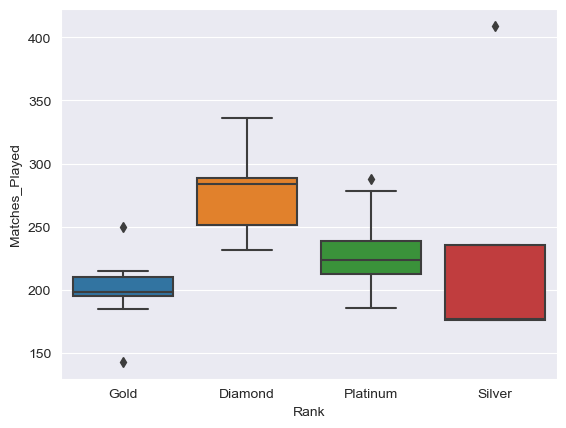

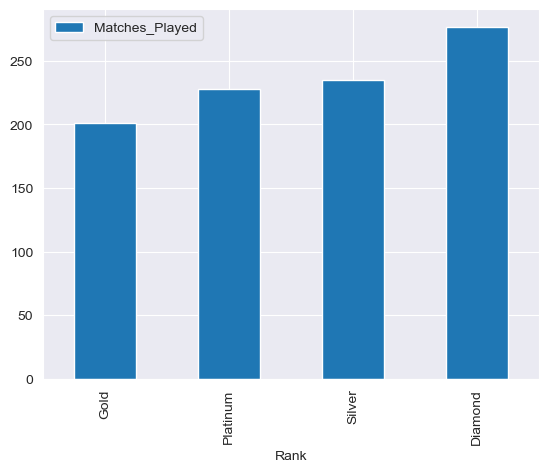

In [21]:
sns.boxplot(x="Rank",y="Matches_Played",data=df)
df.groupby(["Rank"])["Matches_Played"].mean().reset_index().sort_values(["Matches_Played"]).plot(x="Rank",y="Matches_Played",kind="bar")


>**Rank vs Kills**


<Axes: xlabel='Rank'>

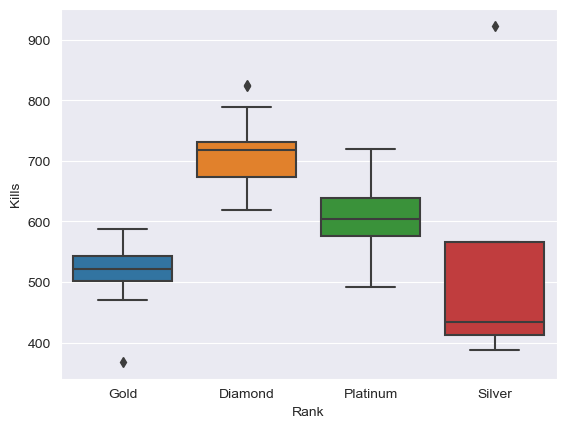

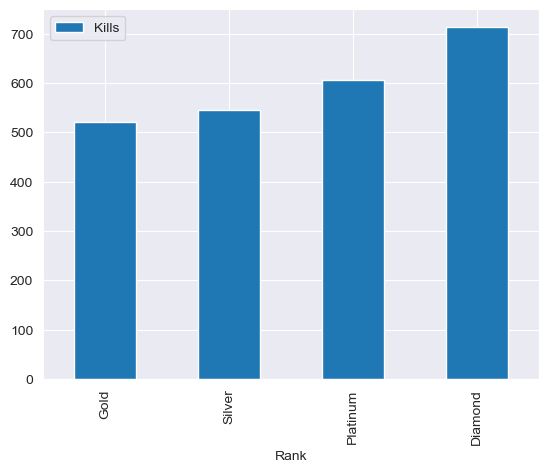

In [22]:
sns.boxplot(x="Rank",y="Kills",data=df)
df.groupby(["Rank"])["Kills"].mean().reset_index().sort_values(["Kills"]).plot(x="Rank",y="Kills",kind="bar")

>**Rank vs deaths**

<Axes: xlabel='Rank'>

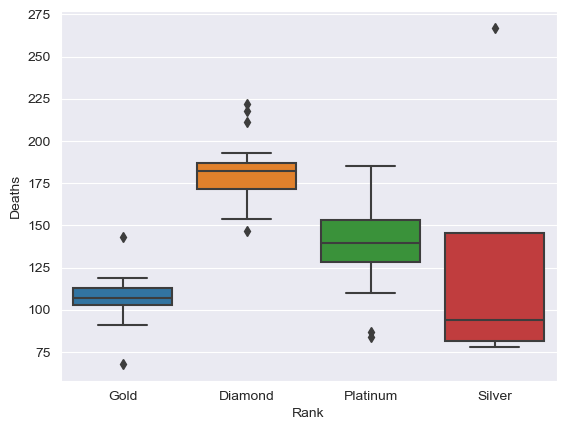

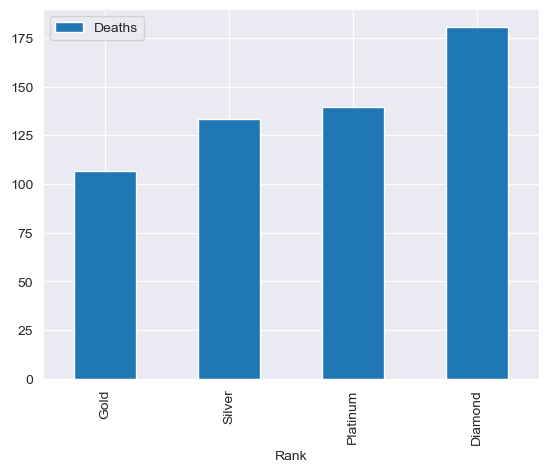

In [23]:
sns.boxplot(x="Rank",y="Deaths",data=df)
df.groupby(["Rank"])["Deaths"].mean().reset_index().sort_values(["Deaths"]).plot(x="Rank",y="Deaths",kind="bar")

>**Rank vs Wins**

<Axes: xlabel='Rank'>

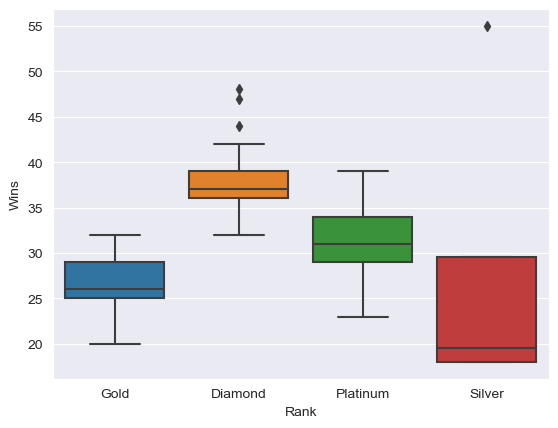

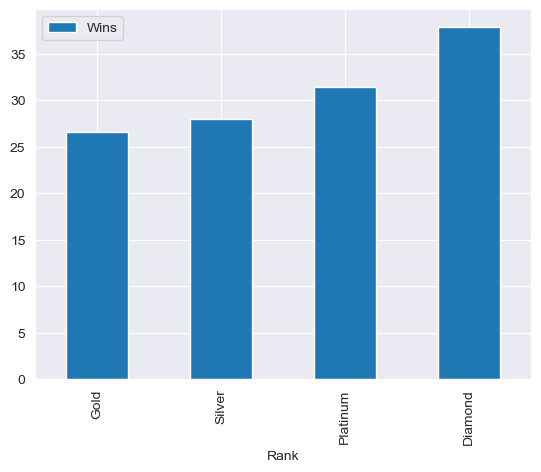

In [24]:
sns.boxplot(x="Rank",y="Wins",data=df)
df.groupby(["Rank"])["Wins"].mean().reset_index().sort_values(["Wins"]).plot(x="Rank",y="Wins",kind="bar")

In [25]:
df.columns

Index(['Player_Name', 'Matches_Played', 'Kills', 'Deaths', 'Assists',
       'Damage_Dealt', 'Headshots', 'Wins', 'Top_10s', 'Revives',
       'Distance_Traveled', 'Weapons_Used', 'Time_Survived', 'Rank'],
      dtype='object')

>**Rank vs distance travelled**

<Axes: xlabel='Rank'>

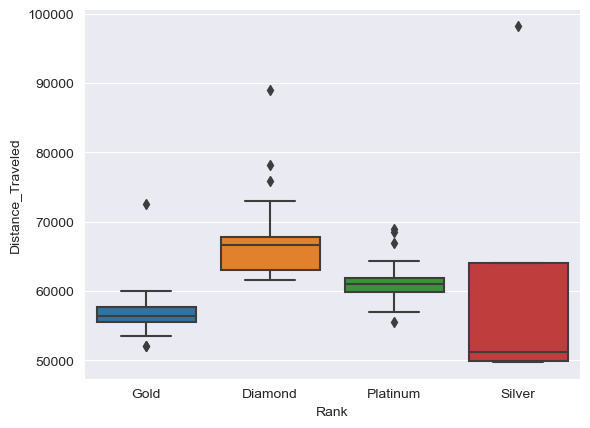

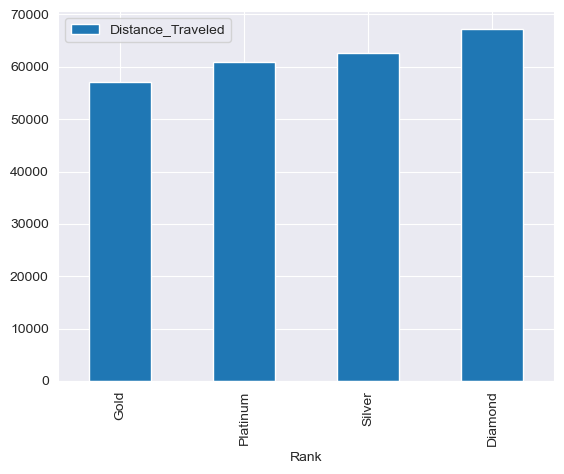

In [26]:
sns.boxplot(x="Rank",y="Distance_Traveled",data=df)
df.groupby(["Rank"])["Distance_Traveled"].mean().reset_index().sort_values(["Distance_Traveled"]).plot(x="Rank",y="Distance_Traveled",kind="bar")

>**Numerical vs numerical**

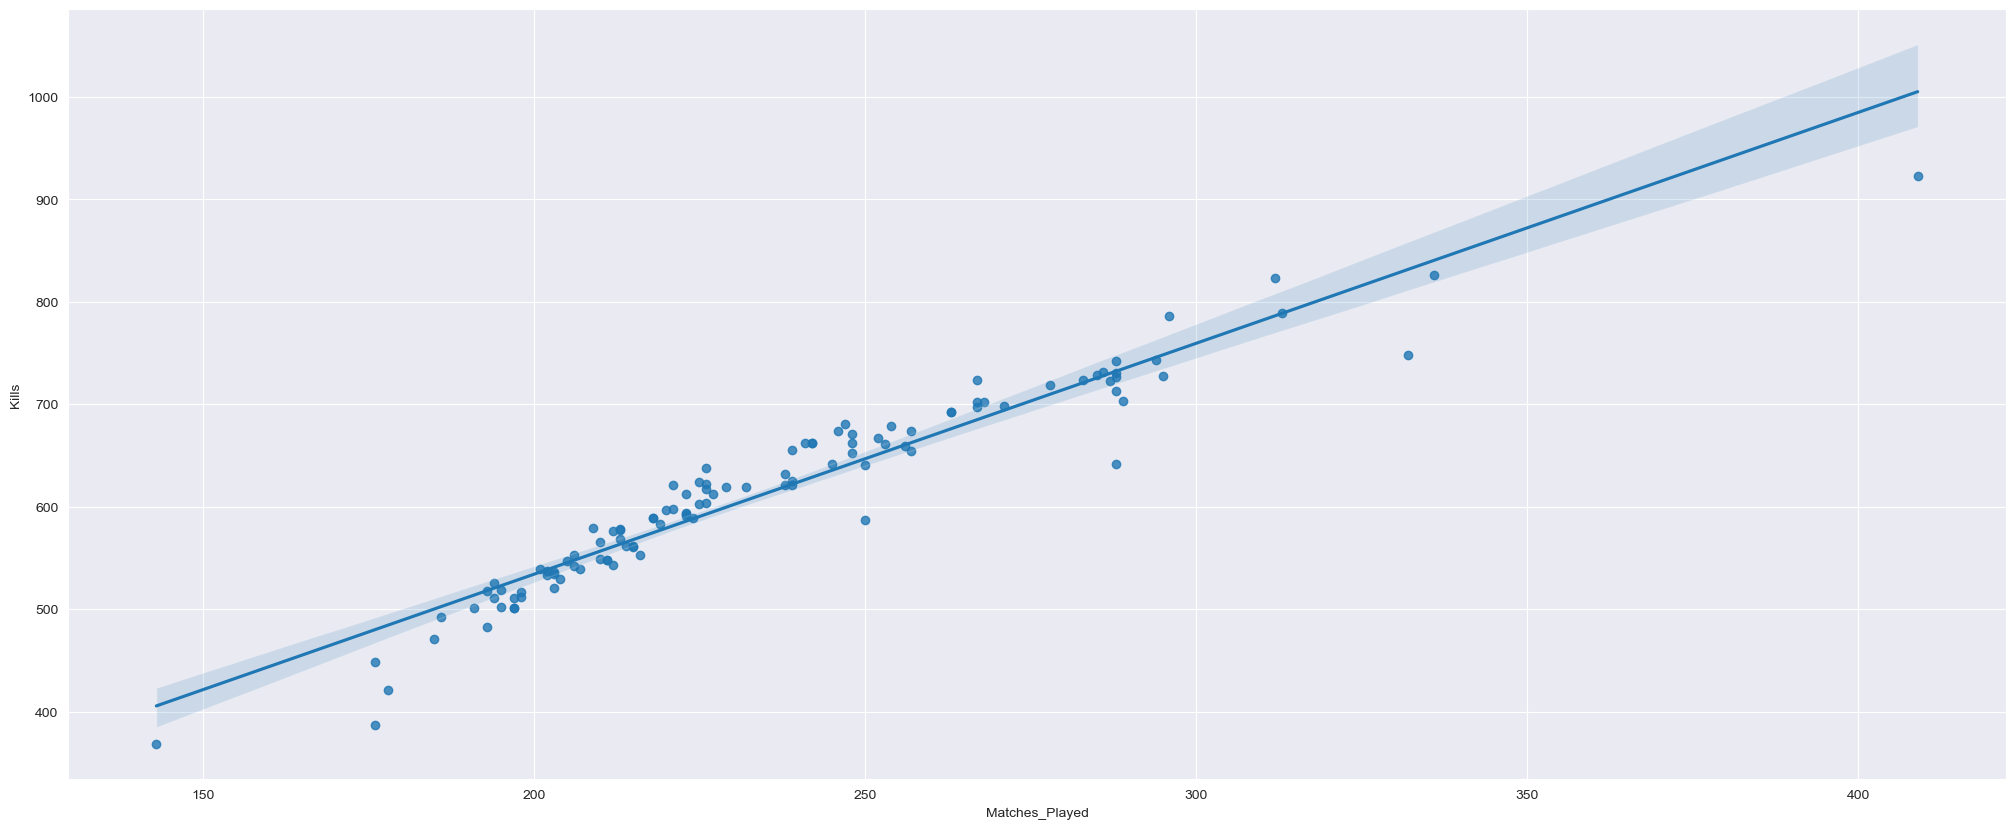

In [27]:
figure = plt.figure(figsize=(25,10))

ax = sns.regplot(x='Matches_Played',y='Kills', data=df) # regression plot - scatter plot with a regression line

>**good linear relationship between matches player and kills**

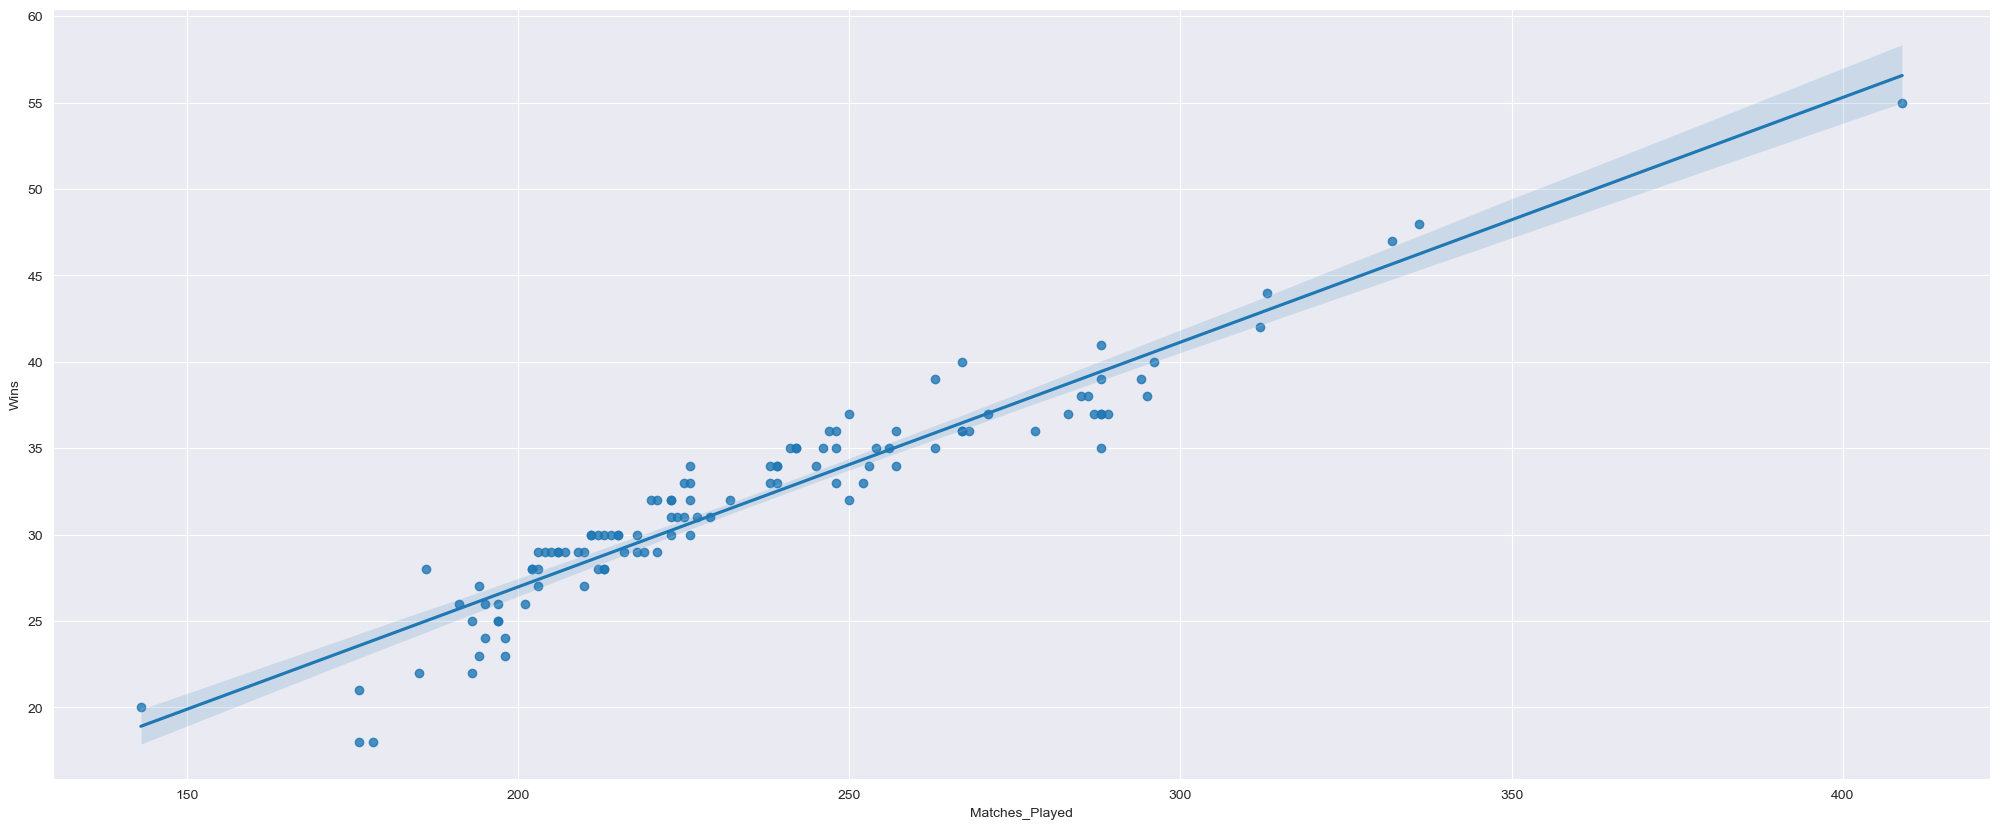

In [28]:
figure = plt.figure(figsize=(25,10))

ax = sns.regplot(x='Matches_Played',y='Wins', data=df)

>**linearly good relationship between matches played and wins**

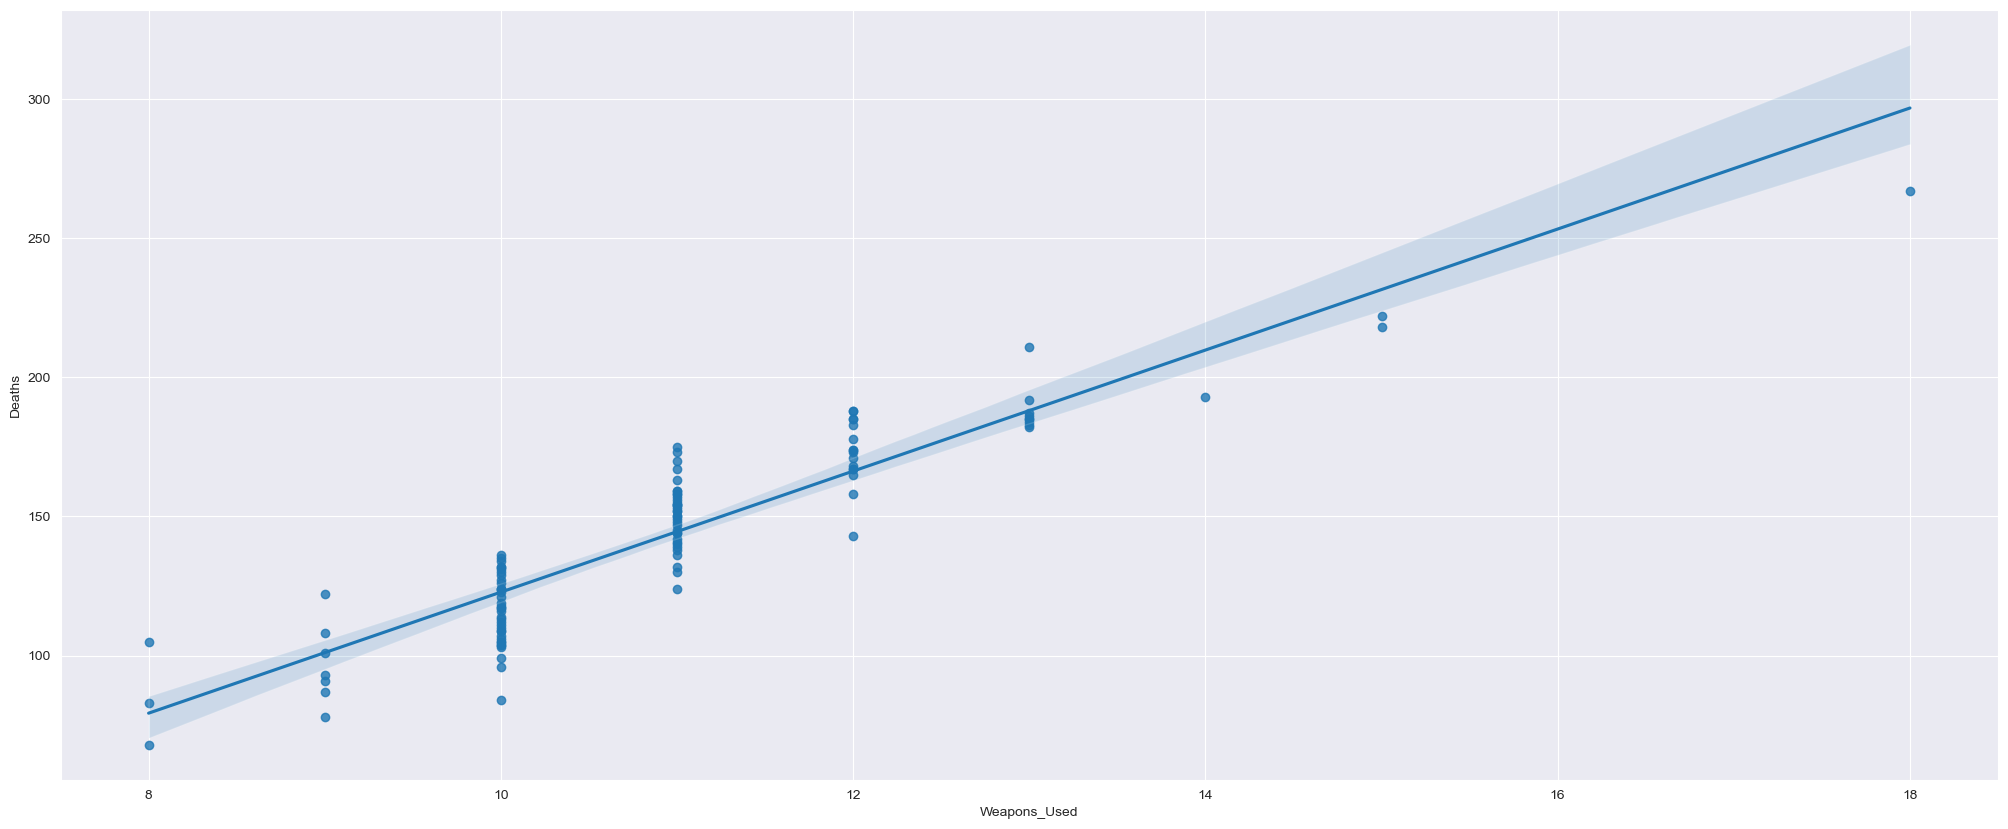

In [29]:
figure = plt.figure(figsize=(25,10))

ax = sns.regplot(x='Weapons_Used',y='Deaths', data=df)

>**good relationship between weapons used and deaths**

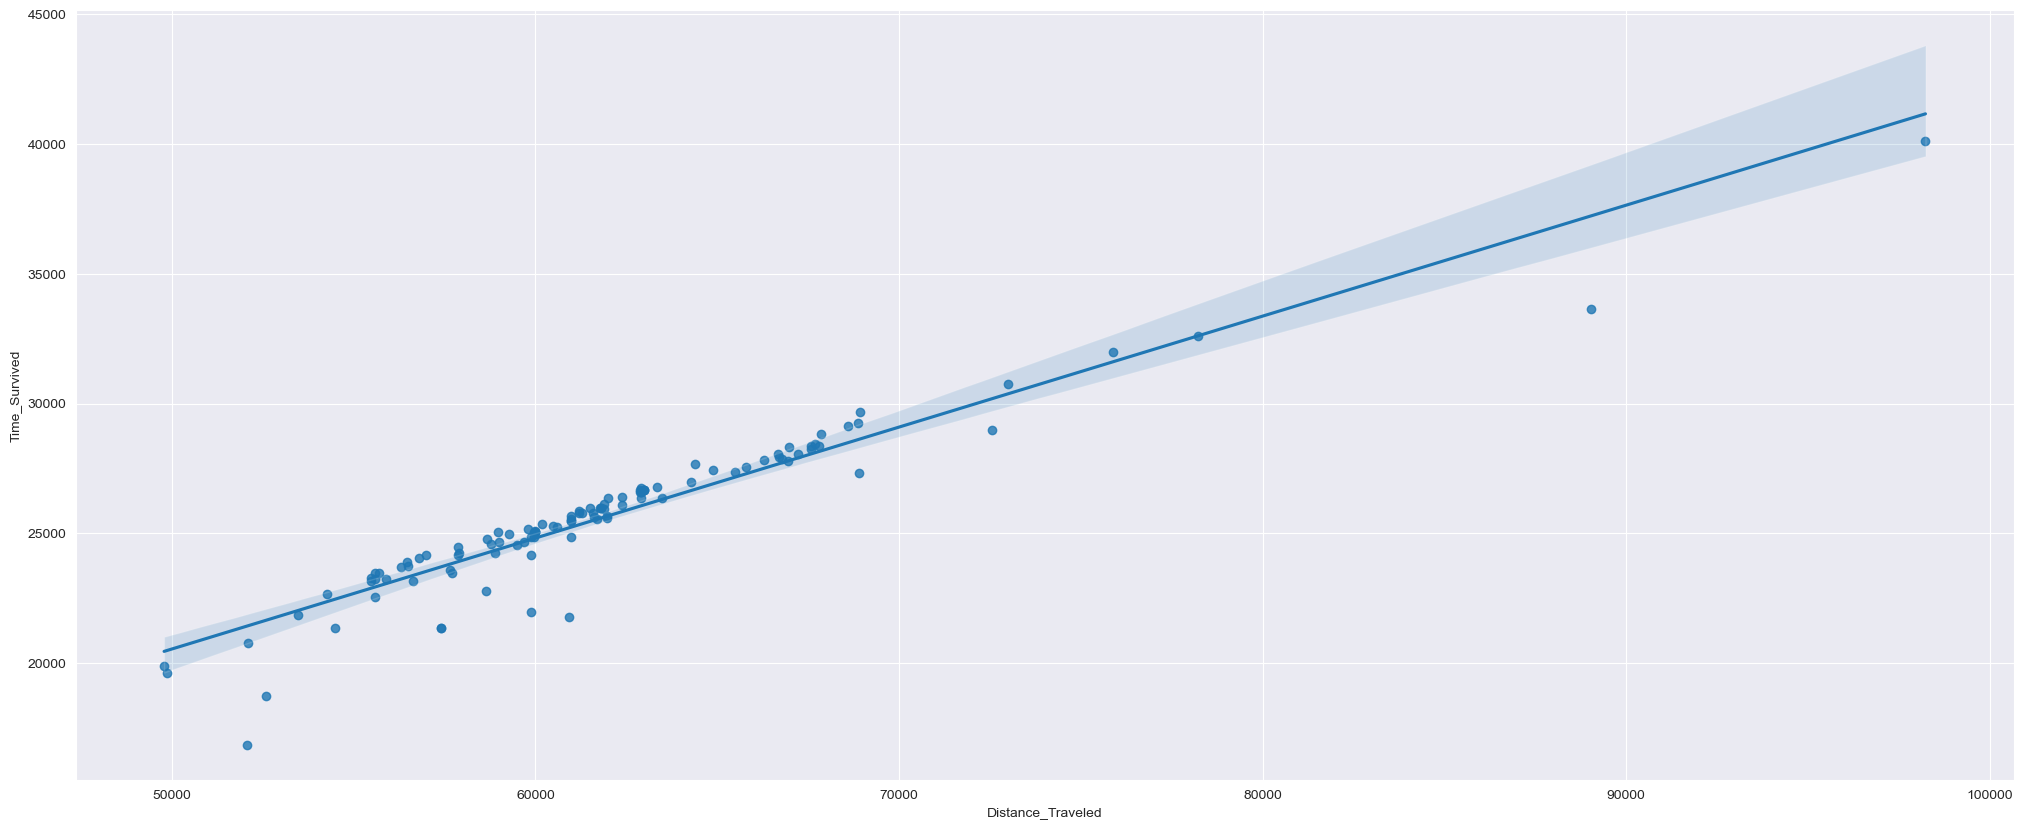

In [30]:
figure = plt.figure(figsize=(25,10))

ax = sns.regplot(x='Distance_Traveled',y='Time_Survived', data=df)

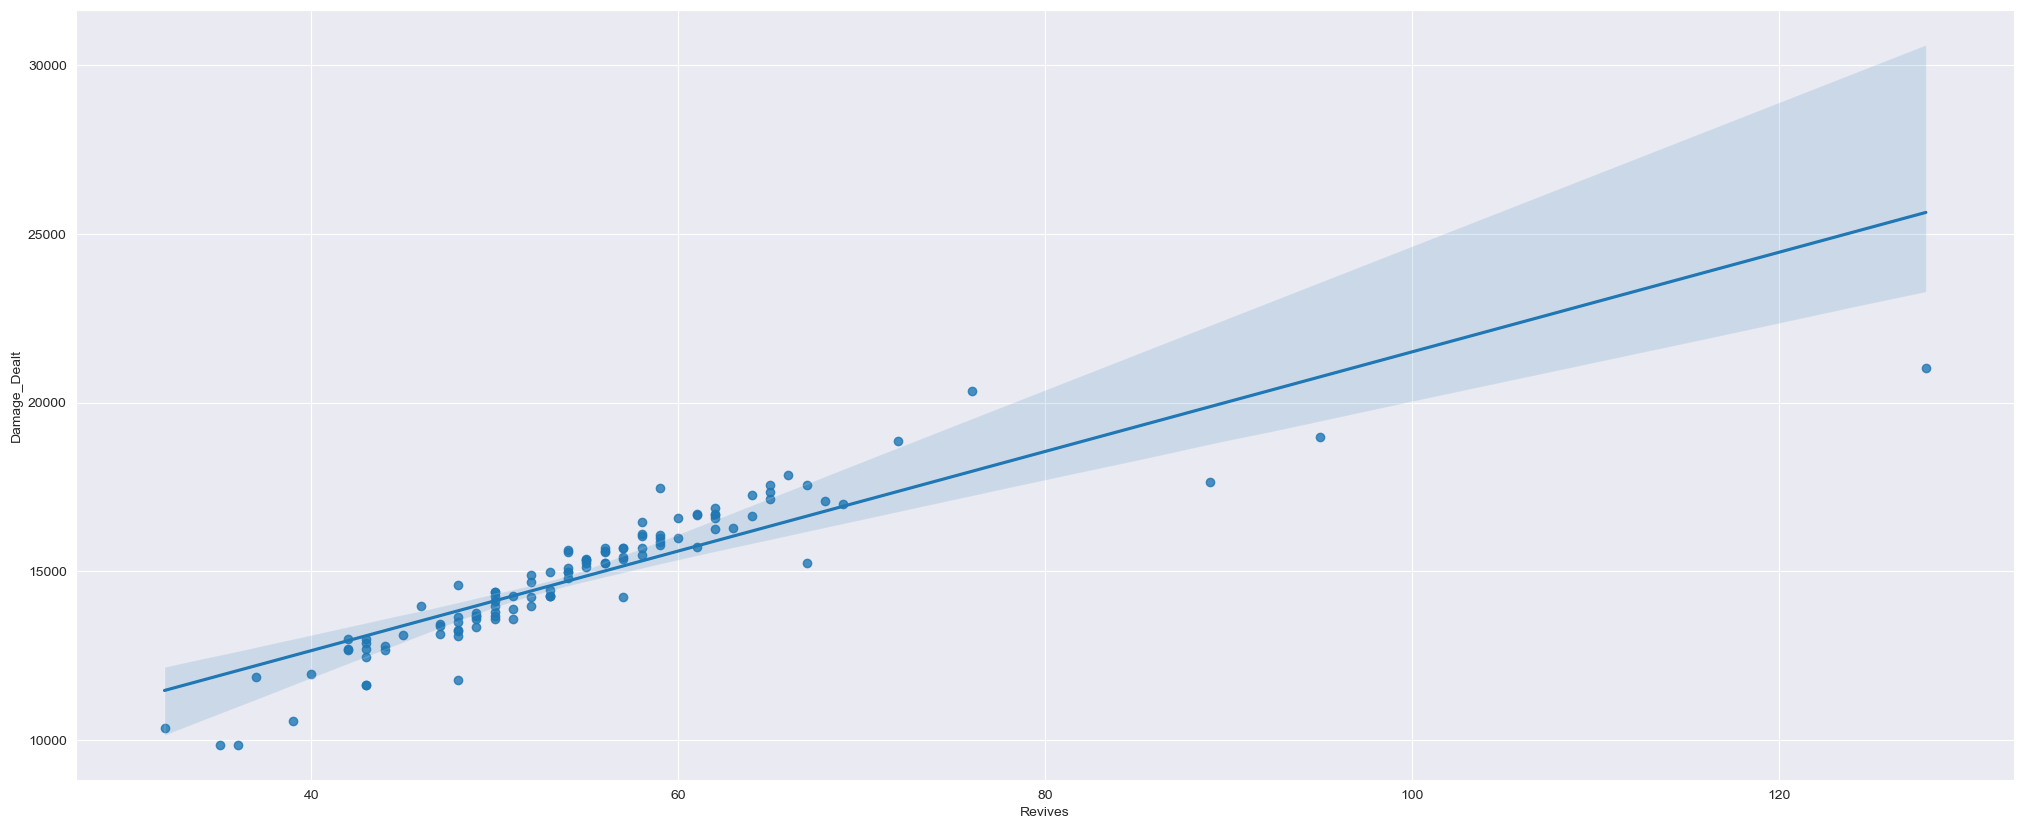

In [31]:
figure = plt.figure(figsize=(25,10))

ax = sns.regplot(x='Revives',y='Damage_Dealt', data=df) # regression plot - scatter plot with a regression line

>**it is also good relationship between them**

# Multivariate analysis



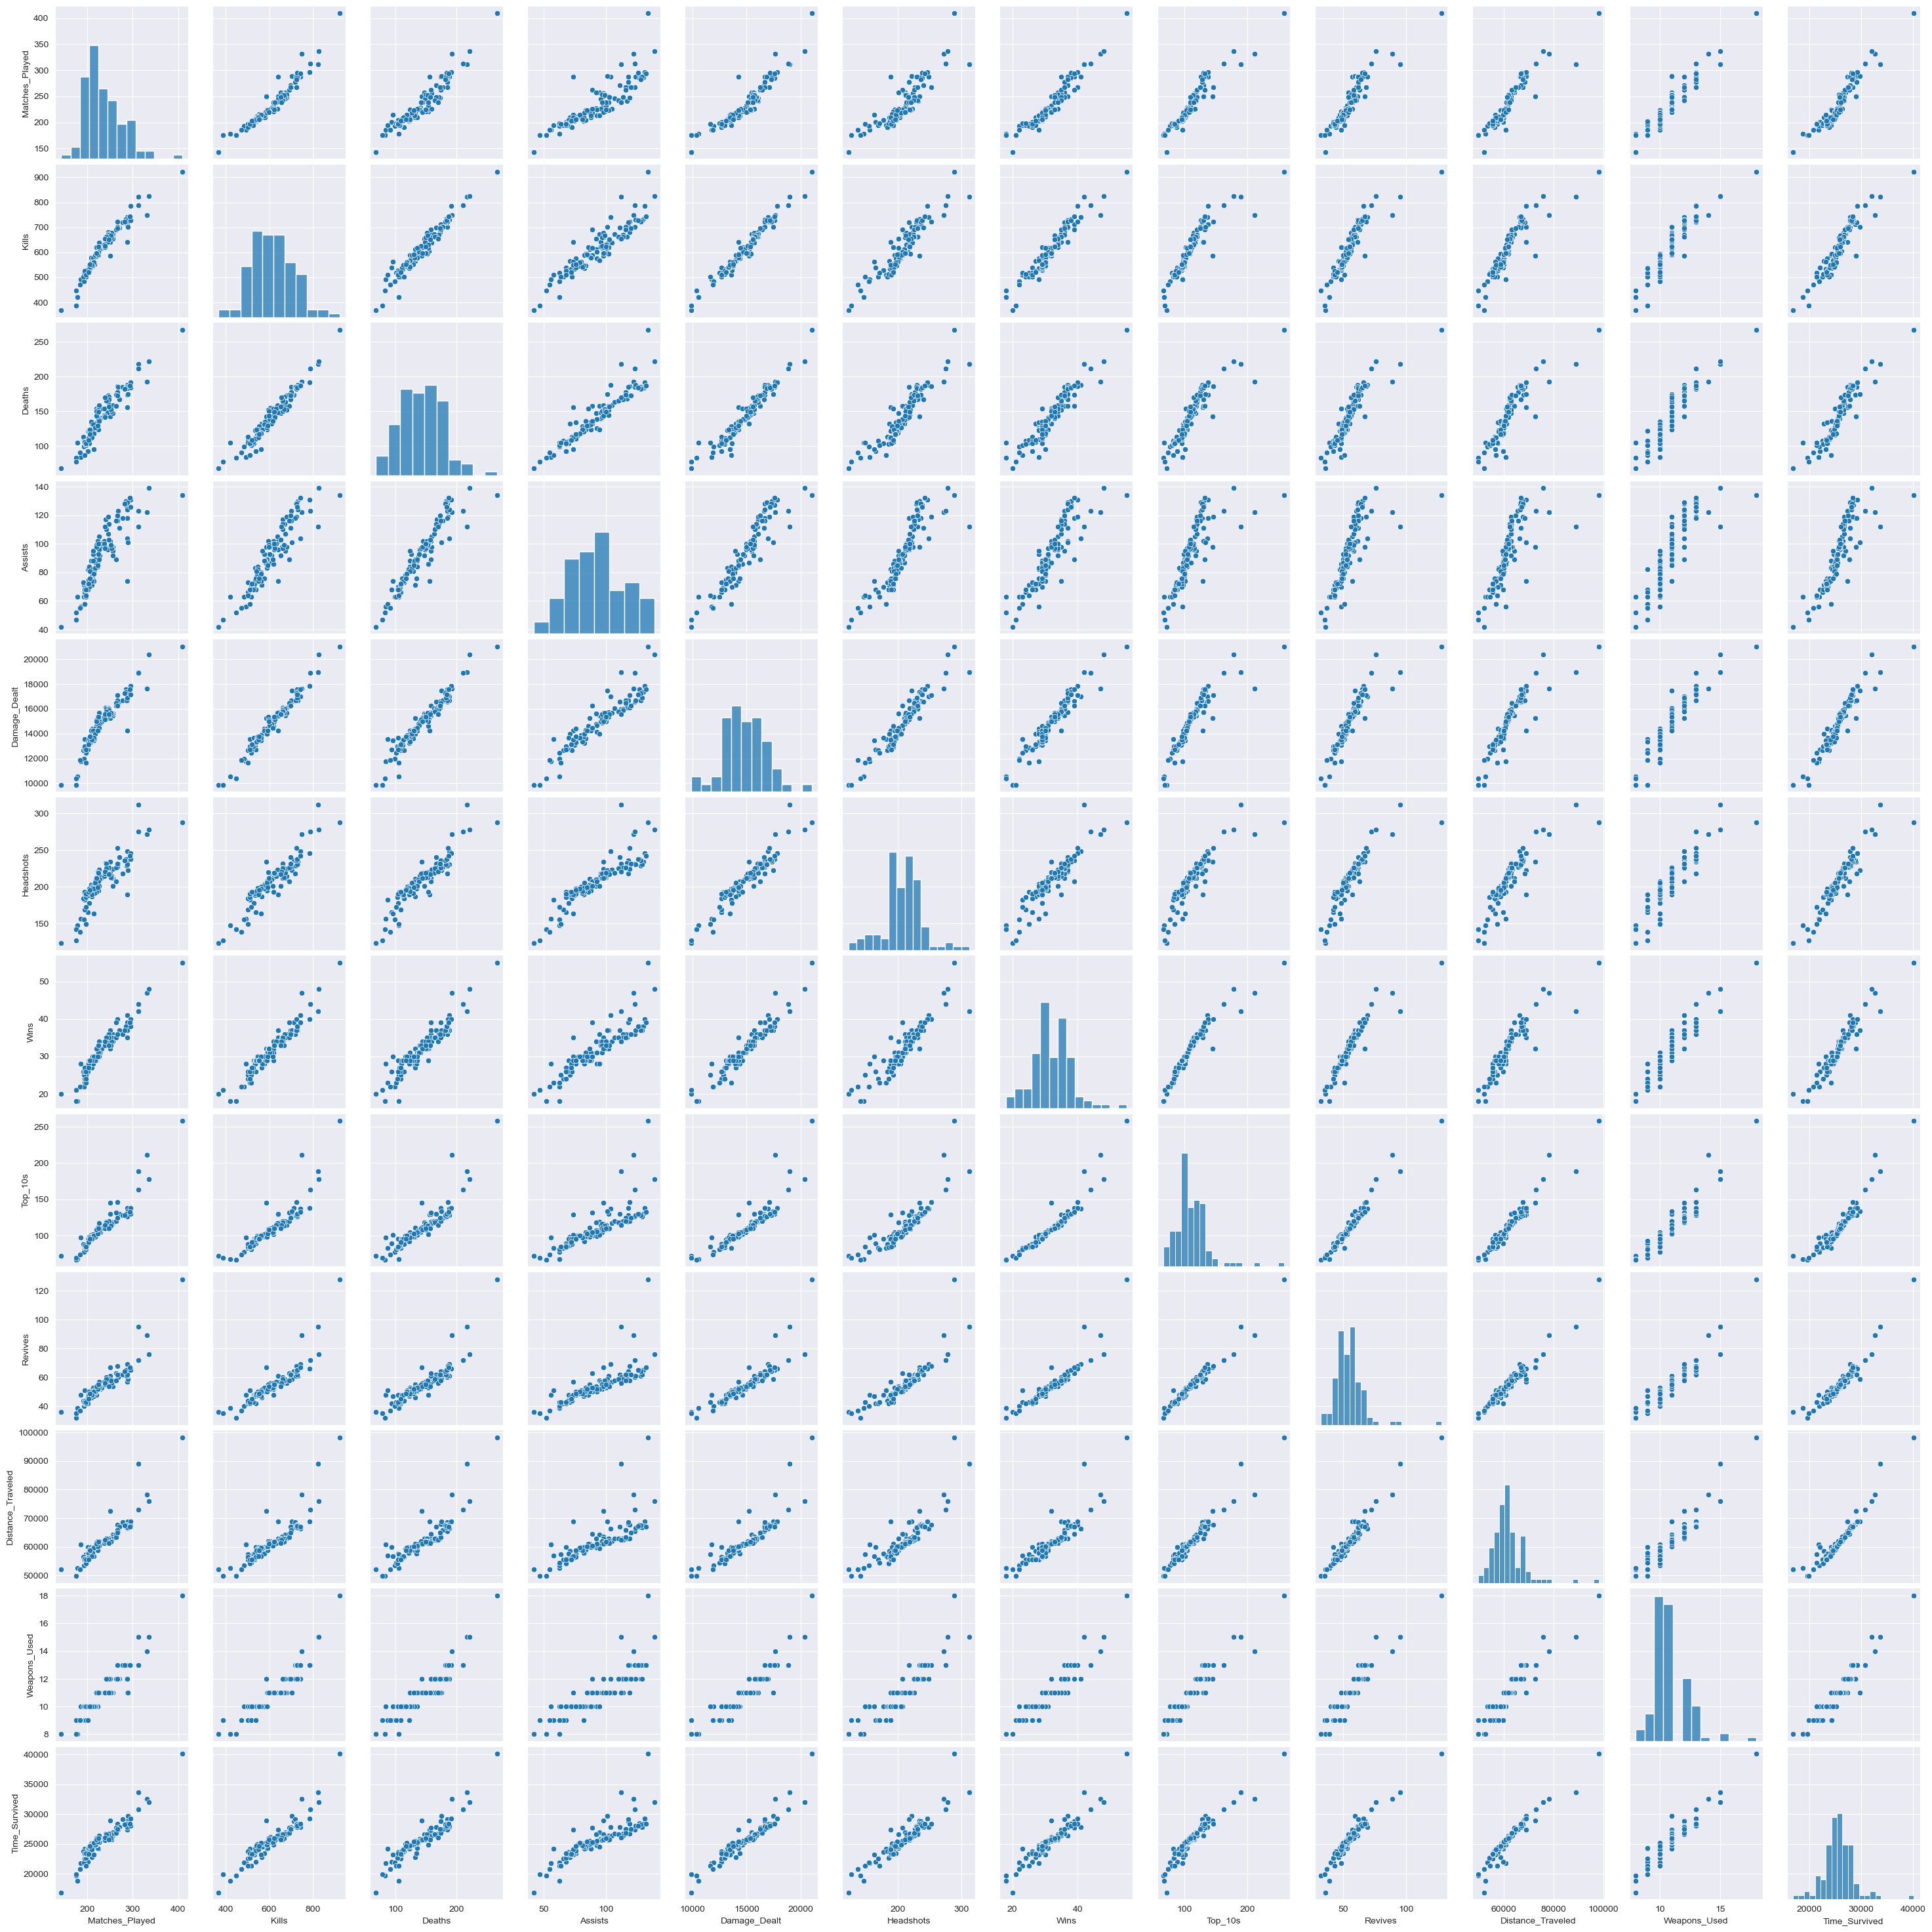

In [32]:
sns.pairplot(data=df)

In [33]:
import plotly.express as px
Player_Name_top10=px.bar(df,x="Player_Name",y="Matches_Played")
Player_Name_top10.show()

## Top 3 player played more matches

In [34]:
df=df.sort_values(by='Matches_Played',ascending=False)
#top 5 players with the highest played matches
top_5_player=df.head(3)
print(top_5_player)




       Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
3    ThunderStrike             409    923     267      134         21037   
34  RuthlessRaptor             336    826     222      139         20357   
8      SavageQueen             332    748     193      122         17654   

    Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  \
3         288    55      258      128              98234            18   
34        278    48      178       76              75894            15   
8         272    47      211       89              78216            14   

    Time_Survived     Rank  
3           40128   Silver  
34          31984  Diamond  
8           32598  Diamond  


Text(0.5, 1.0, 'top 3 person by matches played highly')

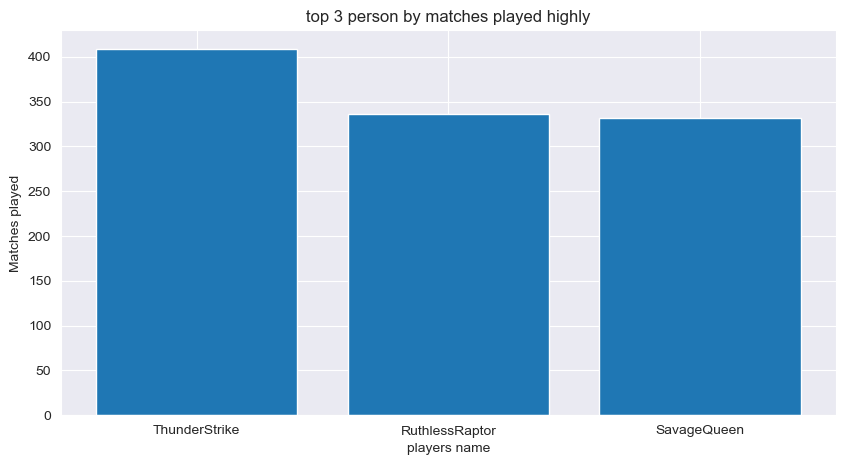

In [35]:
# create chart for the top 5 player are highest played matches
plt.figure(figsize=(10,5))
plt.bar(top_5_player["Player_Name"],top_5_player["Matches_Played"])
plt.xlabel("players name")
plt.ylabel("Matches played")
plt.title("top 3 person by matches played highly")

>**ThunderStrike was played more no of matches compare to others**

## Top 3 player taken highest kill matches 

Text(0.5, 1.0, 'top 3 person taken highest kills in matches')

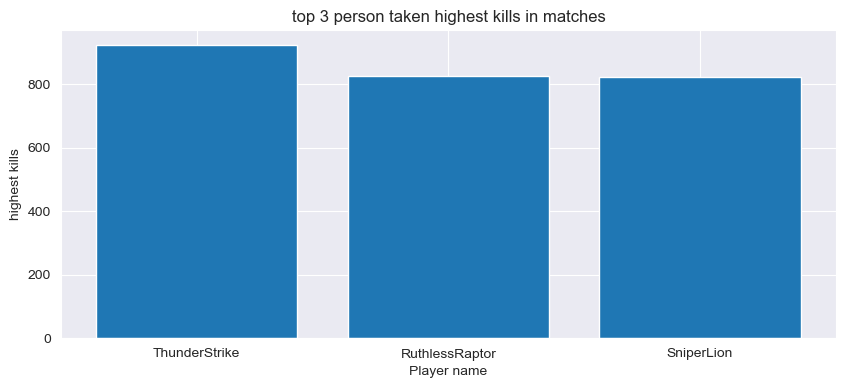

In [36]:
df=df.sort_values(by="Kills",ascending=False)
df
top_5_kills=df.head(3)
top_5_kills
plt.figure(figsize=(10,4))
plt.bar(top_5_kills["Player_Name"],top_5_kills["Kills"])
plt.xlabel("Player name")
plt.ylabel("highest kills")
plt.title("top 3 person taken highest kills in matches")

>**Thunderstrike was took highest kills comare to all
and 2rd one is Ruthlessraptor**

## Top 3 player by wins

Text(0.5, 1.0, 'top 3 person by wins')

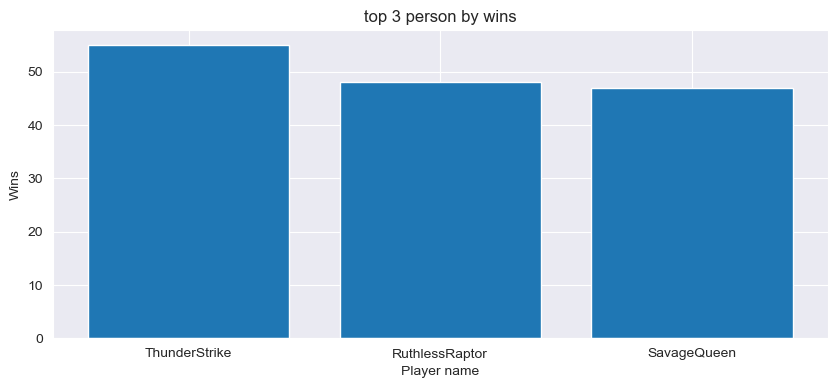

In [37]:
df=df.sort_values(by="Wins",ascending=False)
df
top_5_kills=df.head(3)
top_5_kills
plt.figure(figsize=(10,4))
plt.bar(top_5_kills["Player_Name"],top_5_kills["Wins"])
plt.xlabel("Player name")
plt.ylabel("Wins")
plt.title("top 3 person by wins")

>**Thunderstike won the more number of matches**

## Top 3 player by Rank

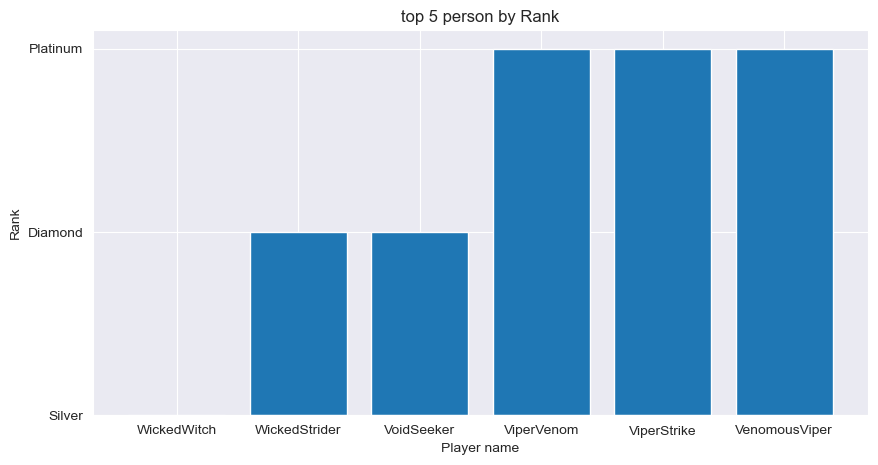

In [38]:
df=df.sort_values(by="Player_Name",ascending=False)
df
top_5_kills=df.head(6)
top_5_kills
plt.figure(figsize=(10,5))
plt.bar(top_5_kills["Player_Name"],top_5_kills["Rank"])
plt.xlabel("Player name")
plt.ylabel("Rank")
plt.title("top 5 person by Rank")
plt.show()

>**most of player are platinaum rank**

<Axes: xlabel='Rank'>

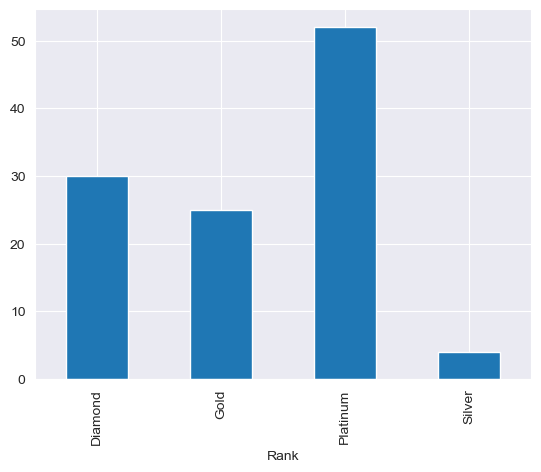

In [39]:
df.Rank.value_counts().sort_index().plot(kind="bar")

# outliers analysis
### we are imputing the  outliers with means

In [40]:
col=['Matches_Played', 'Kills', 'Deaths', 'Assists',
       'Damage_Dealt', 'Headshots', 'Wins', 'Top_10s', 'Revives',
       'Distance_Traveled', 'Weapons_Used', 'Time_Survived']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in Matches_Played Before Imputing : 3


 Mean of Matches_Played is 231


 Total Number of outliers in Matches_Played After Imputing : 0


 Total Number of outliers in Kills Before Imputing : 1


 Mean of Kills is 610


 Total Number of outliers in Kills After Imputing : 0


 Total Number of outliers in Deaths Before Imputing : 1


 Mean of Deaths is 141


 Total Number of outliers in Deaths After Imputing : 0


 Total Number of outliers in Assists Before Imputing : 0


 Mean of Assists is 92


 Total Number of outliers in Assists After Imputing : 0


 Total Number of outliers in Damage_Dealt Before Imputing : 4


 Mean of Damage_Dealt is 14808


 Total Number of outliers in Damage_Dealt After Imputing : 0


 Total Number of outliers in Headshots Before Imputing : 9


 Mean of Headshots is 206


 Total Number of outliers in Headshots After Imputing : 0


 Total Number of outliers in Wins Before Imputing : 5


 Mean of Wins is 31


 Total Number of outliers in W

>**we have imputed all outliers with mean**

In [41]:
df

Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
33     WickedWitch             176    387      78       47         14808   
55   WickedStrider             232    619     154      100         14976   
72      VoidSeeker             248    671     171      114         15978   
36      ViperVenom             221    621     154       86         14598   
63     ViperStrike             202    533     110       72         13157   
..             ...             ...    ...     ...      ...           ...   
90     BlazeRanger             225    603     139       93         14678   
5        BlazeFury             288    642     156       74         14238   
68      AzureBlade             227    612     138       92         14789   
73     AstralSword             203    536     123       83         13247   
109  AbyssGuardian             220    597     144       98         14967   

     Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  \
33         206    21       69       35              60957             9   
55         213    32      110       53              61587            11   
72         225    36      120       59              62987            12   
36         193    29      102       48              60986            11   
63         189    28       96       47              55478            10   
..         ...   ...      ...      ...                ...           ...   
90         207    31      106       52              60967            11   
5          189    35      129       57              68894            11   
68         210    31      107       54              60589            11   
73         194    28       92       48              57856            10   
109        212    32      108       54              60978            11   

     Time_Survived      Rank  
33           25476    Silver  
55           25789   Diamond  
72           26689   Diamond  
36           24872  Platinum  
63           23156  Platinum  
..             ...       ...  
90           25479  Platinum  
5            27345  Platinum  
68           25257  Platinum  
73           24157  Platinum  
109          25679  Platinum  

[111 rows x 14 columns]

## enocoding rank column

In [42]:
le=LabelEncoder()
df["Rank"]=le.fit_transform(df["Rank"])
df["Rank"].value_counts().sort_index()

Rank
0    30
1    25
2    52
3     4
Name: count, dtype: int64

In [43]:
df

Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
33     WickedWitch             176    387      78       47         14808   
55   WickedStrider             232    619     154      100         14976   
72      VoidSeeker             248    671     171      114         15978   
36      ViperVenom             221    621     154       86         14598   
63     ViperStrike             202    533     110       72         13157   
..             ...             ...    ...     ...      ...           ...   
90     BlazeRanger             225    603     139       93         14678   
5        BlazeFury             288    642     156       74         14238   
68      AzureBlade             227    612     138       92         14789   
73     AstralSword             203    536     123       83         13247   
109  AbyssGuardian             220    597     144       98         14967   

     Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  \
33         206    21       69       35              60957             9   
55         213    32      110       53              61587            11   
72         225    36      120       59              62987            12   
36         193    29      102       48              60986            11   
63         189    28       96       47              55478            10   
..         ...   ...      ...      ...                ...           ...   
90         207    31      106       52              60967            11   
5          189    35      129       57              68894            11   
68         210    31      107       54              60589            11   
73         194    28       92       48              57856            10   
109        212    32      108       54              60978            11   

     Time_Survived  Rank  
33           25476     3  
55           25789     0  
72           26689     0  
36           24872     2  
63           23156     2  
..             ...   ...  
90           25479     2  
5            27345     2  
68           25257     2  
73           24157     2  
109          25679     2  

[111 rows x 14 columns]

In [44]:
df["Rank"]=df["Rank"].astype("category")
#changing datatype to object  to into because when apply the zscore the category/object are not converted

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 33 to 109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Player_Name        111 non-null    object  
 1   Matches_Played     111 non-null    int64   
 2   Kills              111 non-null    int64   
 3   Deaths             111 non-null    int64   
 4   Assists            111 non-null    int64   
 5   Damage_Dealt       111 non-null    int64   
 6   Headshots          111 non-null    int64   
 7   Wins               111 non-null    int64   
 8   Top_10s            111 non-null    int64   
 9   Revives            111 non-null    int64   
 10  Distance_Traveled  111 non-null    int64   
 11  Weapons_Used       111 non-null    int64   
 12  Time_Survived      111 non-null    int64   
 13  Rank               111 non-null    category
dtypes: category(1), int64(12), object(1)
memory usage: 12.4+ KB


<Axes: xlabel='Rank'>

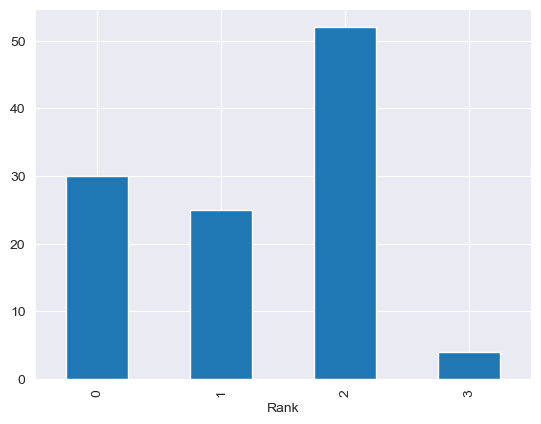

In [46]:
df.Rank.value_counts().sort_index().plot(kind="bar")

In [47]:
# Arrange data into independent variables and dependent variables
x=df.drop(['Rank','Player_Name'],axis=1)
y=df['Rank'] #target

In [48]:
xscale=x.apply(zscore)
xscale

Matches_Played     Kills    Deaths   Assists  Damage_Dealt  Headshots  \
33        -1.661592 -2.520171 -1.984978 -2.119043     -0.000075  -0.028469   
55         0.007788  0.095160  0.377504  0.323420      0.099481   0.296832   
72         0.484754  0.681355  0.905954  0.968598      0.693261   0.854490   
36        -0.320126  0.117706  0.377504 -0.321759     -0.124520  -0.632599   
63        -0.886523 -0.874316 -0.990249 -0.966938     -0.978448  -0.818485   
..              ...       ...       ...       ...           ...        ...   
90        -0.200884 -0.085207 -0.088775  0.000830     -0.077112   0.018002   
5          1.677169  0.354439  0.439675 -0.874769     -0.337854  -0.818485   
68        -0.141264  0.016249 -0.119860 -0.045254     -0.011334   0.157417   
73        -0.856712 -0.840497 -0.586140 -0.460012     -0.925115  -0.586127   
109       -0.349936 -0.152845  0.066651  0.231251      0.094148   0.250360   

         Wins   Top_10s   Revives  Distance_Traveled  Weapons_Used  \
33  -2.255935 -2.233637 -2.337195          -0.000203     -1.442642   
55   0.066575  0.168367 -0.018568           0.162689      0.112050   
72   0.911124  0.754222  0.754308           0.524669      0.889396   
36  -0.566837 -0.300317 -0.662631           0.007296      0.112050   
63  -0.777974 -0.651829 -0.791443          -1.416840     -0.665296   
..        ...       ...       ...                ...           ...   
90  -0.144562 -0.065975 -0.147380           0.002383      0.112050   
5    0.699987  1.281491  0.496683           2.051970      0.112050   
68  -0.144562 -0.007389  0.110245          -0.095352      0.112050   
73  -0.777974 -0.886171 -0.662631          -0.801990     -0.665296   
109  0.066575  0.051196  0.110245           0.005227      0.112050   

     Time_Survived  
33       -0.000341  
55        0.166595  
72        0.646603  
36       -0.322480  
63       -1.237695  
..             ...  
90        0.001259  
5         0.996476  
68       -0.117143  
73       -0.703820  
109       0.107927  

[111 rows x 12 columns]

In [49]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(xscale, y, test_size=0.30, random_state=10)

In [50]:
print(" The x trains data is : {0:0.2f}%".format((len(x_train)/len(df))*100))
print(" The y trains data is : {0:0.2f}%".format((len(y_train)/len(df))*100))
print(" The x test data is : {0:0.2f}%".format((len(x_test)/len(df))*100))
print(" The y test data is : {0:0.2f}%".format((len(y_test)/len(df))*100))


 The x trains data is : 69.37%
 The y trains data is : 69.37%
 The x test data is : 30.63%
 The y test data is : 30.63%


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss,f1_score

In [52]:
from sklearn import metrics
l=LogisticRegression()
l.fit(x_train,y_train)
ypre=l.predict(x_test)
print(l.score(x_train,y_train))
print(l.score(x_test,y_test))
print("accuracy score:",round(accuracy_score(y_test,ypre)*100,2),"%")


0.8571428571428571
0.8529411764705882
accuracy score: 85.29 %


<Axes: >

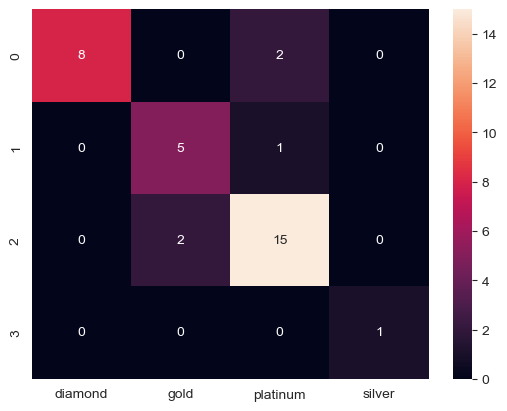

In [53]:

cm=metrics.confusion_matrix(y_test,ypre, labels=[0,1,2,3])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1,2,3]],
                  columns=["diamond","gold","platinum","silver"])
sns.heatmap(df_cm,annot=True)

In [54]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.71      0.83      0.77         6
           2       0.83      0.88      0.86        17
           3       1.00      1.00      1.00         1

    accuracy                           0.85        34
   macro avg       0.89      0.88      0.88        34
weighted avg       0.87      0.85      0.86        34



In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpre=rfc.predict(x_test)
print("accuracy score: ",round(accuracy_score(y_test,rfcpre)*100,2),"%")
print("precison score:",(precision_score(y_test,rfcpre,average="micro")))
print("recall score:",(recall_score(y_test,rfcpre,average="micro")))
print("f1 score:",(f1_score(y_test,rfcpre,average="micro")))


accuracy score:  91.18 %
precison score: 0.9117647058823529
recall score: 0.9117647058823529
f1 score: 0.9117647058823528


Text(0.5, 1.0, 'top 10 feature importance each attributes(random forest)')

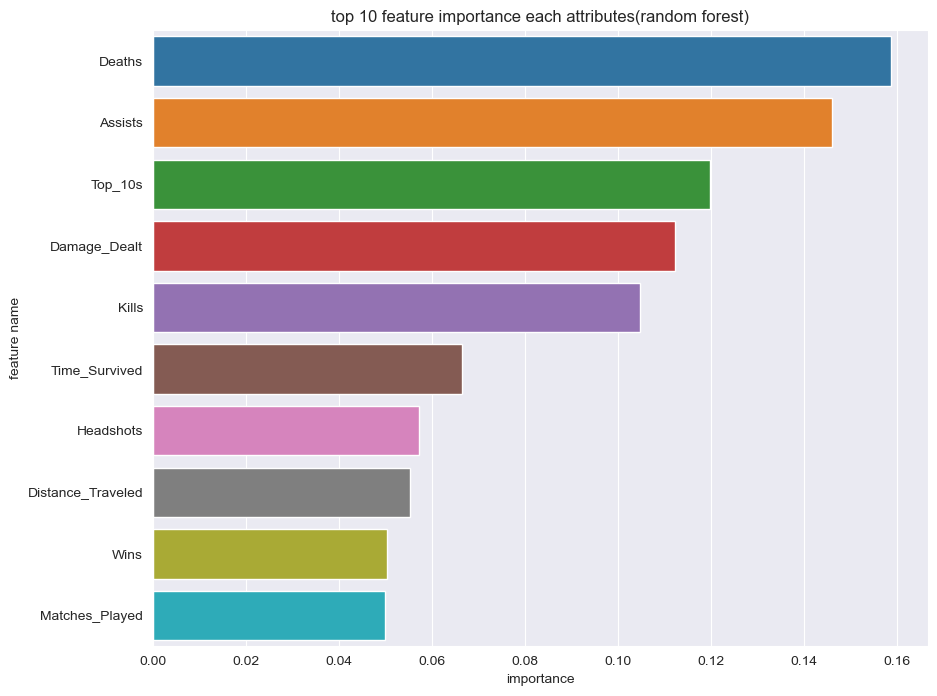

In [56]:
imp_df=pd.DataFrame({
    "feature name":x_train.columns,
    "importance":rfc.feature_importances_
})
f1=imp_df.sort_values(by="importance",ascending=False)
fi2=f1.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='importance',y="feature name")
plt.title("top 10 feature importance each attributes(random forest)")

<Axes: >

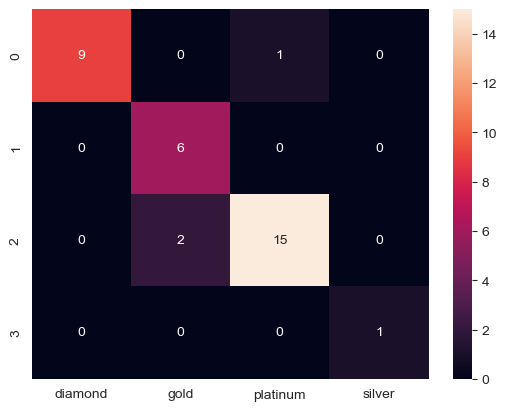

In [57]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,rfcpre,labels=[0,1,2,3])
dfcm=pd.DataFrame(cm,index=[i for i in [0,1,2,3]],
                 columns=["diamond","gold","platinum","silver"])
sns.heatmap(dfcm,annot=True)

In [66]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
gb_model=GaussianNB()
rfc_model=RandomForestClassifier()

svc_model_linear = SVC(kernel='linear')
svc_model_rbf = SVC(kernel='rbf')
svc_model_poly  = SVC(kernel="poly") 
svc_model_sigmoid=SVC(kernel="sigmoid")


"""

svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01) """

"\n\nsvc_model_linear = SVC(kernel='linear',C=1,gamma=.6)\nsvc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)\nsvc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01) "

LR: 0.812879 (0.142700)
KNN: 0.831061 (0.130076)
svsm li: 0.813636 (0.184581)
svm rbf: 0.813636 (0.155412)
svm poly: 0.714394 (0.175981)
gb: 0.805303 (0.182513)
rfc: 0.850000 (0.157525)
svm sig: 0.668939 (0.136534)


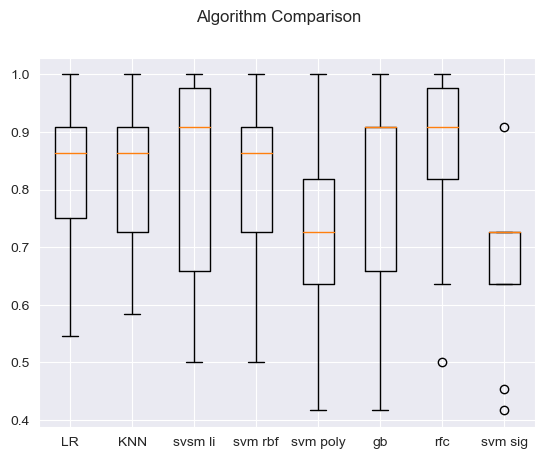

In [67]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(("svsm li",svc_model_linear))
models.append(("svm rbf",svc_model_rbf))
models.append(("svm poly",svc_model_poly))
models.append(("gb",gb_model))
models.append(("rfc",rfc_model))
models.append(("svm sig",svc_model_sigmoid))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  xscale,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()